# Gender Bias in Multilingual Embeddings

This notebook is for the intrinsic bias analysis. For extrinsic bias analysis, please refer to the "Extrinsic Bias Analysis" section in the [Github](https://github.com/Saghar-H/Gender_bias_in-Cross_Lingual_Transfer_Learning) repo.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np

In [3]:
import os
import random
random.seed(2)

In [4]:
import scipy

In [5]:
import sys
sys.path.insert(0, "/home/jyzhao/Github/debiaswe/debiaswe")

In [6]:
from collections import defaultdict

In [7]:
gender_definitions_files = 'en_gender_pairs.json'

In [8]:
gender_pairs = json.load(open(gender_definitions_files, 'r'))

In [9]:
gender_pairs = [[x.lower(), y.lower()] for x,y in gender_pairs]

In [10]:
import we

In [11]:
female_def = [x.strip().lower() for x in open('female_def', 'r').readlines()]
male_def = [x.strip().lower() for x in open('male_def', 'r').readlines()]

In [12]:
def sim(E, x, y):
    return 1 - scipy.spatial.distance.cosine(E.v(x), E.v(y))

def dis(E, x, y):
    return scipy.spatial.distance.cosine(E.v(x), E.v(y))

def sim_v(u, v):
    return 1 - scipy.spatial.distance.cosine(u, v)

In [13]:
def cal_bias_paired(E, paired_m, paired_f, paired_en, gender_def_pairs):
    assert len(paired_m) == len(paired_f) 
    O, M, F = [], [], []
    
    for x in range(len(paired_m)):
        overall = np.average([abs(dis(E, paired_m[x], m) - dis(E, paired_f[x], f))\
                             for f,m in gender_def_pairs])
        
#     for f,m in gender_def_pairs:
#         overall = np.average([abs(dis(E, paired_m[x], m) - \
#                                        dis(E, paired_f[x], f)) \
#                                    for x in range(len(paired_f))])
#         F_dis = np.average([abs(dis(E, x, f)) \
#                                    for x in paired_f])
#         M_dis = np.average([abs(dis(E, x, m)) \
#                                    for x in paired_m])
        O.append(overall) 
        F.append(0)
        M.append(0)
    return O, np.average(O), np.average(F), np.average(M)

### 1. Bias in English

In [23]:
en_ori_file = '/home/jyzhao/git7/fastText/alignment/data/wiki.en.vec'
en_debiased_file = '/home/t-jizhao/Github/fastText/alignment/data/wiki.en_debias.vec'

In [465]:
en_sup_es_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-es.vec' #fasttext EN-->Es
en_sup_de_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-de.vec' #fasttext EN-->de
en_sup_fr_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-fr.vec' 

In [25]:
en_sup_tr_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.en-tr.vec'

In [24]:
en_ori_E = we.WordEmbedding(en_ori_file)

*** Reading data from /home/jyzhao/git7/fastText/alignment/data/wiki.en.vec
2519370 vocabs; 300 dimensions
(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [469]:
en_ori_gd = we.doPCA(gender_pairs, en_ori_E).components_[0]

In [482]:
en_deb_E = we.WordEmbedding(en_debiased_file)

1152it [00:00, 11515.73it/s]

*** Reading data from /home/t-jizhao/Github/fastText/alignment/data/wiki.en_debias.vec


2519370it [03:46, 11131.38it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [483]:
en_deb_gd = we.doPCA(gender_pairs, en_deb_E).components_[0]

In [23]:
en_sup_es_E = we.WordEmbedding(en_sup_es_file)
en_sup_es_gd = we.doPCA(gender_pairs, en_sup_es_E).components_[0]

1271it [00:00, 12708.62it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en-es.vec


2519370it [03:29, 12041.88it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [24]:
en_sup_de_E = we.WordEmbedding(en_sup_de_file)
en_sup_de_gd = we.doPCA(gender_pairs, en_sup_de_E).components_[0]

1186it [00:00, 11850.26it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en-de.vec


2519370it [03:30, 11990.83it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [25]:
en_sup_fr_E = we.WordEmbedding(en_sup_fr_file)
en_sup_fr_gd = we.doPCA(gender_pairs, en_sup_fr_E).components_[0]

1268it [00:00, 12675.87it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en-fr.vec


2519370it [03:29, 12042.95it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [26]:
en_sup_tr_E = we.WordEmbedding(en_sup_tr_file)
en_sup_tr_gd = we.doPCA(gender_pairs, en_sup_tr_E).components_[0]

*** Reading data from /home/jyzhao/git7/fastText/alignment/res/wiki.en-tr.vec
2519370 vocabs; 300 dimensions
(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [ ]:
# en_sup_pl_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-pl.vec' 
# en_sup_pl_E = we.WordEmbedding(en_sup_pl_file)
# en_sup_pl_gd = we.doPCA(gender_pairs, en_sup_pl_E).components_[0]

In [ ]:
# en_sup_tr_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-tr.vec' 
# en_sup_tr_E = we.WordEmbedding(en_sup_tr_file)
# en_sup_tr_gd = we.doPCA(gender_pairs, en_sup_tr_E).components_[0]

In [27]:
vocab = en_ori_E.words

In [18]:
vocab = [x.strip() for x in open('en_vocab', 'r').readlines()]

FileNotFoundError: [Errno 2] No such file or directory: 'en_vocab'

In [19]:
en_occ_def_f_raw = [x.strip().split('\t')[0] for x in open('en_female_def_occ').readlines()]
en_occ_def_m_raw = [x.strip().split('\t')[0] for x in open('en_male_def_occ').readlines()]

In [30]:
ids = []
for x in range(len(en_occ_def_m_raw)):
    if en_occ_def_f_raw[x] in vocab and en_occ_def_m_raw[x] in vocab:
        ids.append(x)  
    else:
        print(x)
len(ids)

257

In [31]:
en_occ_def_f = [en_occ_def_f_raw[x] for x in ids]
en_occ_def_m =[en_occ_def_m_raw[x] for x in ids]

In [32]:
len(en_occ_def_f), len(en_occ_def_m)

(257, 257)

In [33]:
len(vocab), vocab[:3]

(2519370, [',', '.', 'the'])

In [37]:
np.linalg.norm(en_sup_es_E.v('he'))

1.0

In [38]:
#Using paired English occupations such as actor/actress
O_en_ori_p, O, F, M = cal_bias_paired(en_ori_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in original EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_ori_s, O, F, M = cal_bias_paired(en_ori_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in original EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_ori, O, F, M = cal_bias_paired(en_ori_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in original EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in original EN, average bias:0.11584819376155951, avg F_bias:0.0, avg M_bias:0.0
in original EN, average bias:0.04818327522933639, avg F_bias:0.0, avg M_bias:0.0
in original EN, average bias:0.08425367927180553, avg F_bias:0.0, avg M_bias:0.0


In [39]:
O_en_sup_es_p, O, F, M = cal_bias_paired(en_sup_es_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_s, O, F, M = cal_bias_paired(en_sup_es_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_sup_es, O, F, M = cal_bias_paired(en_sup_es_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.08373373569036924, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.04052598915994167, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.06355891240767933, avg F_bias:0.0, avg M_bias:0.0


In [42]:
scipy.stats.ttest_ind(O_en_ori, O_en_sup_es)

Ttest_indResult(statistic=5.1671736727104935, pvalue=3.4114945368621213e-07)

In [43]:
scipy.stats.ttest_ind(O_en_ori_p, O_en_sup_es_p)

Ttest_indResult(statistic=6.03528452832083, pvalue=5.177276421535492e-09)

In [44]:
O_en_sup_de_p, O, F, M = cal_bias_paired(en_sup_de_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_sup_de_s, O, F, M = cal_bias_paired(en_sup_de_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_sup_de, O, F, M = cal_bias_paired(en_sup_de_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.09238641758578536, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.042131873788312076, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.06892126094883286, avg F_bias:0.0, avg M_bias:0.0


In [45]:
scipy.stats.ttest_ind(O_en_ori, O_en_sup_de), scipy.stats.ttest_ind(O_en_ori_p, O_en_sup_de_p)

(Ttest_indResult(statistic=3.6881246183263614, pvalue=0.0002500675820411351),
 Ttest_indResult(statistic=4.291516392313291, pvalue=2.469562653792818e-05))

In [46]:
O_en_sup_fr_p, O, F, M = cal_bias_paired(en_sup_fr_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_sup_fr_s, O, F, M = cal_bias_paired(en_sup_fr_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_sup_fr, O, F, M = cal_bias_paired(en_sup_fr_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.0849744494052699, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.04030301903995375, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.06411619398177598, avg F_bias:0.0, avg M_bias:0.0


In [47]:
scipy.stats.ttest_ind(O_en_ori, O_en_sup_fr), scipy.stats.ttest_ind(O_en_ori_p, O_en_sup_fr_p)

(Ttest_indResult(statistic=4.974844424316072, pvalue=8.930050768691257e-07),
 Ttest_indResult(statistic=5.761250608961644, pvalue=2.255823786430979e-08))

In [34]:
O_en_sup_tr, O, F, M = cal_bias_paired(en_sup_tr_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in tr-aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in tr-aligned EN, average bias:0.059185084214831034, avg F_bias:0.0, avg M_bias:0.0


In [48]:
O_en_deb_p, O, F, M = cal_bias_paired(en_deb_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_deb_s, O, F, M = cal_bias_paired(en_deb_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_en_deb, O, F, M = cal_bias_paired(en_deb_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.08436909973702944, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.011394706051796676, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.05029545288011141, avg F_bias:0.0, avg M_bias:0.0


In [50]:
endeb_sup_es_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-es.vec' #fasttext EN-->Es
endeb_sup_de_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-de.vec' #fasttext EN-->de
endeb_sup_fr_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-fr.vec' 

In [51]:
endeb_sup_es_E = we.WordEmbedding(endeb_sup_es_file)
endeb_sup_de_E = we.WordEmbedding(endeb_sup_de_file)
endeb_sup_fr_E = we.WordEmbedding(endeb_sup_fr_file)

1272it [00:00, 12713.19it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-es.vec


2519370it [03:23, 12401.10it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


1285it [00:00, 12842.76it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-de.vec


2519370it [03:23, 12370.34it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


1261it [00:00, 12603.43it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.en_debias-fr.vec


2519370it [03:23, 12391.04it/s]


(2519370, 300)
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo
2519370 words of dimension 300 : ,, ., the, </s>, ..., ukihashi, draw_lax, style—but, korpaljo


In [53]:
O_endeb_es_p, O, F, M = cal_bias_paired(endeb_sup_es_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_es_s, O, F, M = cal_bias_paired(endeb_sup_es_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_es, O, F, M = cal_bias_paired(endeb_sup_es_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.06922045627432148, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.0194742158614099, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.045992639739109845, avg F_bias:0.0, avg M_bias:0.0


In [54]:
O_endeb_de_p, O, F, M = cal_bias_paired(endeb_sup_de_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_de_s, O, F, M = cal_bias_paired(endeb_sup_de_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_de, O, F, M = cal_bias_paired(endeb_sup_de_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.07760892616734452, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.026558147553975384, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.05377198673697762, avg F_bias:0.0, avg M_bias:0.0


In [55]:
O_endeb_fr_p, O, F, M = cal_bias_paired(endeb_sup_fr_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_fr_s, O, F, M = cal_bias_paired(endeb_sup_fr_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_endeb_fr, O, F, M = cal_bias_paired(endeb_sup_fr_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.07049909336288479, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.015818073296298585, avg F_bias:0.0, avg M_bias:0.0
in aligned EN, average bias:0.044967099557474896, avg F_bias:0.0, avg M_bias:0.0


In [175]:
scipy.stats.ttest_ind(O_en_ori, O_en_deb), \
scipy.stats.ttest_ind(O_en_ori, O_endeb_es),\
scipy.stats.ttest_ind(O_en_ori, O_endeb_de), \
scipy.stats.ttest_ind(O_en_ori, O_endeb_fr)

(Ttest_indResult(statistic=7.186029400422605, pvalue=2.371029150536117e-12),
 Ttest_indResult(statistic=9.46331759612125, pvalue=1.0832300663309669e-19),
 Ttest_indResult(statistic=7.105125269054787, pvalue=4.0507304937754464e-12),
 Ttest_indResult(statistic=9.49667453714036, pvalue=8.253255005451697e-20))

In [ ]:
O, F, M = cal_bias_paired(en_sup_pl_E, en_occ_def_m[:137], en_occ_def_f[:137], en_occ_def_f[:137], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O, F, M = cal_bias_paired(en_sup_pl_E, en_occ_def_m[137:], en_occ_def_f[137:], en_occ_def_f[137:], gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O, F, M = cal_bias_paired(en_sup_pl_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

In [ ]:
O, F, M = cal_bias_paired(en_sup_tr_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

In [ ]:
en_sup_zh_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.en-zh.vec' 
en_sup_zh_E = we.WordEmbedding(en_sup_zh_file)
en_sup_zh_gd = we.doPCA(gender_pairs, en_sup_zh_E).components_[0]

In [71]:
O, F, M = cal_bias_paired(en_sup_zh_E, en_occ_def_m, en_occ_def_f, en_occ_def_f, gender_pairs)
print(f"in aligned EN, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in aligned EN, average bias:0.12065206021900247, avg F_bias:0.7023072450776363, avg M_bias:0.789209906421255


### 2. Bias in ES

In [63]:
es_ori_file = '/home/jyzhao/git7/fastText/alignment/data/wiki.es.vec'
es_ali_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.es.align.vec'

In [64]:
es_sup_en_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.es-en.vec'
es_sup_de_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.es-de.vec'
es_sup_fr_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.es-fr.vec'

In [65]:
es_sup_endeb_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.es-endeb.vec'

In [66]:
es_ori_E = we.WordEmbedding(es_ori_file)

268it [00:00, 2677.66it/s]

*** Reading data from /home/jyzhao/git7/fastText/alignment/data/wiki.es.vec
985667 vocabs; 300 dimensions


985667it [01:28, 11193.15it/s]


(985667, 300)
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano


In [67]:
es_sup_endeb_E = we.WordEmbedding(es_sup_endeb_file)

479it [00:00, 4788.93it/s]

*** Reading data from /home/jyzhao/git7/fastText/alignment/res/wiki.es-endeb.vec
985667 vocabs; 300 dimensions


985667it [01:25, 11486.17it/s]


(985667, 300)
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano


In [68]:
es_ali_E = we.WordEmbedding(es_ali_file)

226it [00:00, 2210.14it/s]

*** Reading data from /home/jyzhao/git7/fastText/alignment/res/wiki.es.align.vec
985667 vocabs; 300 dimensions


985667it [01:25, 11501.69it/s]


(985667, 300)
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano


In [ ]:
es_sup_en_E = we.WordEmbedding(es_sup_en_file)

In [23]:
es_ali_E.v('her').dot(es_ali_E.v('him'))

0.5887096

In [69]:
es_sup_de_E = we.WordEmbedding(es_sup_de_file)

339it [00:00, 3388.33it/s]

*** Reading data from /home/jyzhao/git7/fastText/alignment/res/wiki.es-de.vec
985667 vocabs; 300 dimensions


985667it [01:25, 11577.81it/s]


(985667, 300)
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano


In [25]:
es_sup_fr_E = we.WordEmbedding(es_sup_fr_file)

1252it [00:00, 12515.92it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.es-fr.vec


985667it [01:23, 11871.34it/s]


(985667, 300)
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano
985667 words of dimension 300 : de, </s>, ,, ., ..., ‘texto, fipronil, bjuv, sartriano


In [980]:
# translate en to es
en2es = defaultdict(list)
with open('/tmp/t-jizhao/data/fasttext/en-es.txt', 'r') as f:
    for line in f:
        en, es = line.strip().split()
        en2es[en].append(es)

In [70]:
es_gender_pairs = json.load(open('es_gender_pairs.json', 'r'))

In [71]:
gender_pairs

[['woman', 'man'],
 ['girl', 'boy'],
 ['she', 'he'],
 ['mother', 'father'],
 ['daughter', 'son'],
 ['gal', 'guy'],
 ['female', 'male'],
 ['her', 'his'],
 ['mary', 'john']]

In [72]:
es_gender_pairs

[['mujer', 'hombre'],
 ['chica', 'chico'],
 ['madre', 'padre'],
 ['hija', 'hijo'],
 ['femenino', 'masculino'],
 ['suya', 'suyo'],
 ['maría', 'juan'],
 ['niña', 'niño'],
 ['ella', 'él']]

In [73]:
es_ori_gd = we.doPCA(es_gender_pairs, es_ori_E).components_[0]
es_ali_gd = we.doPCA(es_gender_pairs, es_ali_E).components_[0]

In [74]:
es_sup_endeb_gd = we.doPCA(es_gender_pairs, es_sup_endeb_E).components_[0]

In [75]:
# es_sup_en_gd = we.doPCA(es_gender_pairs, es_sup_en_E).components_[0]
es_sup_de_gd = we.doPCA(es_gender_pairs, es_sup_de_E).components_[0]
# es_sup_fr_gd = we.doPCA(es_gender_pairs, es_sup_fr_E).components_[0]

In [123]:
# ignored

In [124]:
#read es_occs

In [76]:
def read_occs(f_file, m_file, E):
    es_occ_def_f_raw = []
    es_occ_def_m_raw = []
    with open(f_file, 'r') as es_f, open(m_file, 'r') as es_m:
        for line in es_f.readlines():
            tokens = line.strip().split('\t')
            if tokens[0].lower() not in en_occ_def_f:
                print("wrong line:", tokens)
                break
            es_occ_def_f_raw.append(tokens[1].lower())
        for line in es_m.readlines():
            tokens = line.strip().split('\t')
            if tokens[0].lower() not in en_occ_def_m:
                print("wrong line:", tokens)
                break
            es_occ_def_m_raw.append(tokens[1].lower())

    print(len(es_occ_def_m_raw), len(es_occ_def_f_raw))    
    ids = []
    for idx in range(len(es_occ_def_f_raw)):
        if es_occ_def_f_raw[idx]  in E.words and es_occ_def_m_raw[idx]  in E.words:
            ids.append(idx)
    print(f'{len(ids)} pairs in the embeddings')
    es_occ_def_f = [es_occ_def_f_raw[x] for x in ids]
    es_occ_def_m = [es_occ_def_m_raw[x] for x in ids]
    return es_occ_def_f, es_occ_def_m

In [77]:
es_occ_def_f, es_occ_def_m = read_occs('es_female_def_occ', 'es_male_def_occ', es_ori_E)

257 257
251 pairs in the embeddings


In [78]:
es_occ_def_f[:5], es_occ_def_m[:5]

(['paisana', 'sororal', 'brujas', 'criada', 'diva'],
 ['paisano', 'fraternal', 'brujos', 'criado', 'divo'])

In [38]:
sim(es_sup_fr_E, 'hembra', 'macho')

0.8950151801109314

In [79]:
from sklearn.preprocessing import PowerTransformer

In [80]:
pt = PowerTransformer()

In [133]:
def plot_hist(E):
    x_f = []
    x_m = []
    pca_1 = we.doPCA(es_gender_pairs, E).components_[1]
    pca_0 = we.doPCA(es_gender_pairs, E).components_[0]
    for idx in range(len(es_occ_def_f)):
        x_f.append(np.average([sim_v(E.v(g[0]), E.v(es_occ_def_f[idx])) for g in es_gender_pairs]))
        x_m.append(np.average([sim_v(E.v(g[1]), E.v(es_occ_def_m[idx])) for g in es_gender_pairs]))
    plt.hist(x_f, bins=20, range =(min(min(x_f), min(x_m)), max(max(x_f), max(x_m))))
    plt.hist(x_m, bins=20, range =(min(min(x_f), min(x_m)), max(max(x_f), max(x_m))),  alpha=0.7)

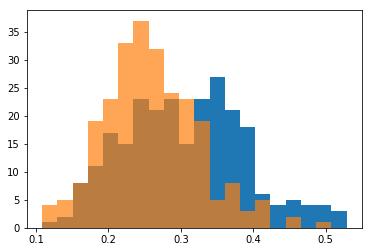

In [134]:
plot_hist(es_ori_E)

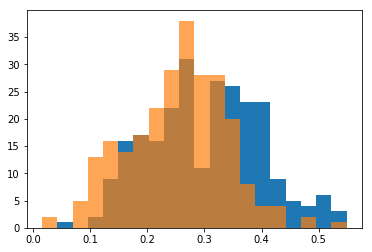

In [135]:
plot_hist(es_ali_E)

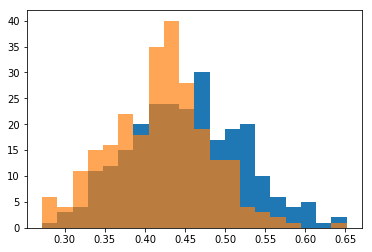

In [136]:
plot_hist(es_sup_de_E)

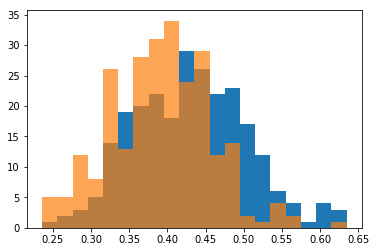

In [137]:
plot_hist(es_sup_endeb_E)

In [155]:
def plot_hist_same_gender(E0, E1, gender = 'f'):
    x_f = []
    x_m = []
    if gender == 'f':
        flag = 0
    else:
        flag = 1
    for idx in range(len(es_occ_def_f)):
        x_f.append(np.average([sim_v(E0.v(g[flag]), E0.v(es_occ_def_f[idx])) for g in es_gender_pairs]))
        x_m.append(np.average([sim_v(E1.v(g[flag]), E1.v(es_occ_def_f[idx])) for g in es_gender_pairs]))
#     plt.hist(x_f, bins=20, range =(min(min(x_f), min(x_m)), max(max(x_f), max(x_m))))
#     plt.hist(x_m, bins=20,  range =(min(min(x_f), min(x_m)), max(max(x_f), max(x_m))), alpha=0.7)
    plt.hist(x_f, bins=20, range =(0, 0.7))
    plt.hist(x_m, bins=20,  range =(0,0.7), alpha=0.7)
    return x_f, x_m

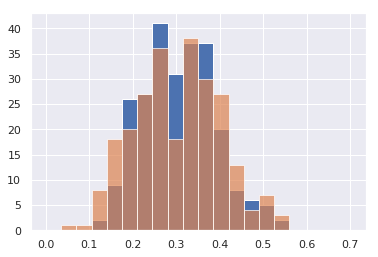

In [192]:
f_ori, f_ali = plot_hist_same_gender(es_ori_E, es_ali_E)

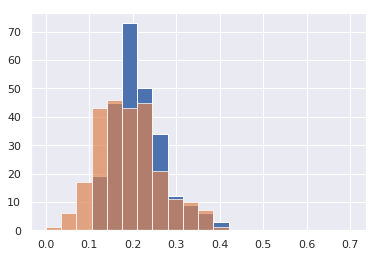

In [191]:
m_ori, m_ali = plot_hist_same_gender(es_ori_E, es_ali_E, 'm')

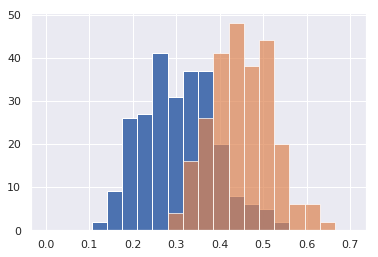

In [193]:
f_ori, f_de = plot_hist_same_gender(es_ori_E, es_sup_de_E)

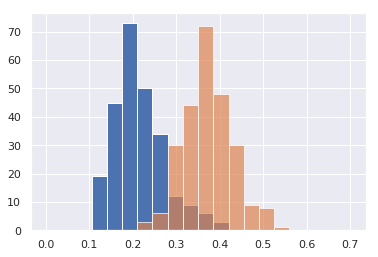

In [194]:
m_ori, m_de = plot_hist_same_gender(es_ori_E, es_sup_de_E, 'm')

In [153]:
from scipy.stats import norm

In [160]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

In [436]:
import seaborn as sns

In [438]:
sns.set()

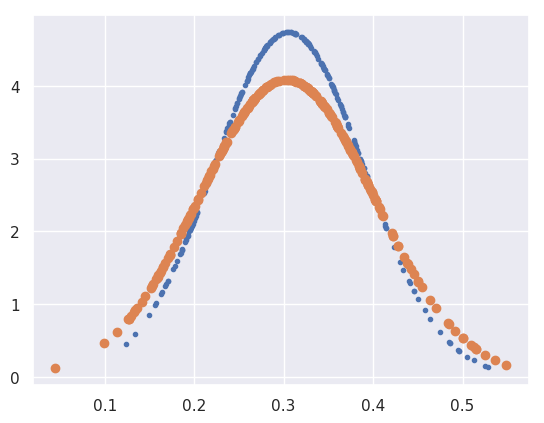

In [439]:
# n, bins, patches = plt.hist(f_ori, 30, normed=1, facecolor='green', alpha=0.75)
mu1, sigma1 =  norm.fit(f_ori)
y = stats.norm.pdf(f_ori, mu1, sigma1)
l = plt.plot(f_ori, y, '.')
mu1, sigma1 =  norm.fit(f_ali)
y = stats.norm.pdf(f_ali, mu1, sigma1)
l = plt.plot(f_ali, y, 'o')

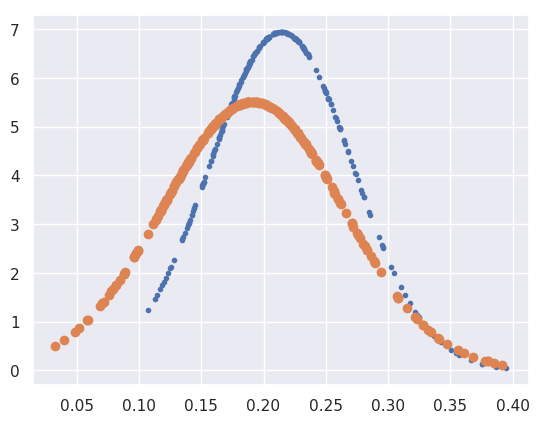

In [440]:
mu1, sigma1 =  norm.fit(m_ori)
y = stats.norm.pdf(m_ori, mu1, sigma1)
l = plt.plot(m_ori, y, '.',  linewidth=2)
mu1, sigma1 =  norm.fit(m_ali)
y = stats.norm.pdf(m_ali, mu1, sigma1)
l = plt.plot(m_ali, y, 'o',  linewidth=2)

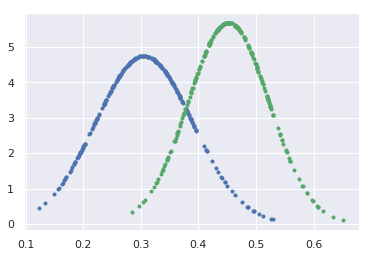

In [207]:
mu1, sigma1 =  norm.fit(f_ori)
y = stats.norm.pdf(f_ori, mu1, sigma1)
l = plt.plot(f_ori, y, '.',  linewidth=2)
mu1, sigma1 =  norm.fit(f_de)
y = stats.norm.pdf(f_de, mu1, sigma1)
l = plt.plot(f_de, y, 'g.',  linewidth=2)

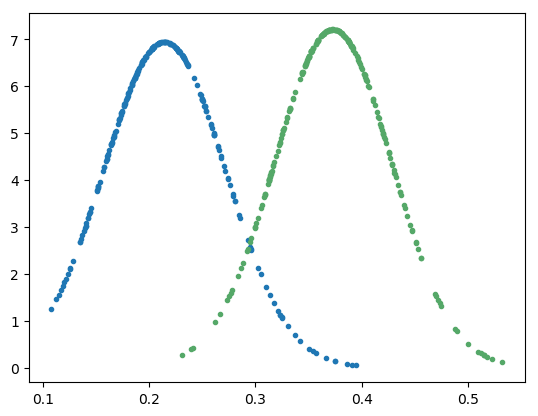

In [437]:
mu1, sigma1 =  norm.fit(m_ori)
y = stats.norm.pdf(m_ori, mu1, sigma1)
l = plt.plot(m_ori, y, '.',  linewidth=2)
mu1, sigma1 =  norm.fit(m_de)
y = stats.norm.pdf(m_de, mu1, sigma1)
l = plt.plot(m_de, y, 'g.',  linewidth=2)

### between M & F in each embeddings

0.30525181009118774 0.21405959983396286 -0.09119221025722488


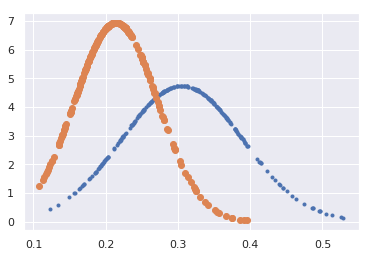

In [244]:
# plt.xlim([0.01, 0.7])
mu1, sigma1 =  norm.fit(f_ori)
y = stats.norm.pdf(f_ori, mu1, sigma1)
l = plt.plot(f_ori, y, '.')
mu2, sigma2 =  norm.fit(m_ori)
y = stats.norm.pdf(m_ori, mu2, sigma2)
l = plt.plot(m_ori, y, 'o')
print(mu1, mu2, mu2-mu1)

0.3030574221465771 0.191242321586427 -0.1118151005601501


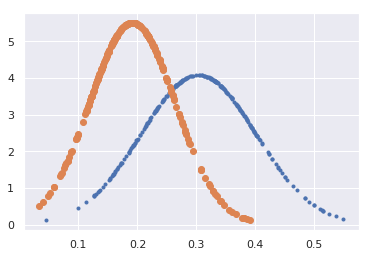

In [242]:
# plt.xlim([0.01, 0.7])
mu1, sigma1 =  norm.fit(f_ali)
y = stats.norm.pdf(f_ali, mu1, sigma1)
l = plt.plot(f_ali, y, '.')
mu2, sigma2 =  norm.fit(m_ali)
y = stats.norm.pdf(m_ali, mu2, sigma2)
l = plt.plot(m_ali, y, 'o')
print(mu1, mu2, mu2-mu1)

0.45205061252452783 0.3728700669935025 -0.07918054553102533


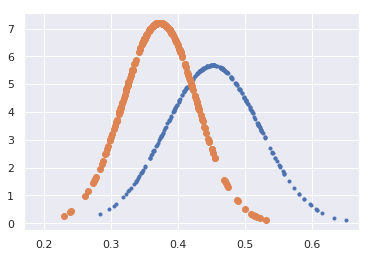

In [243]:
plt.xlim([0.17, 0.67])
mu1, sigma1 =  norm.fit(f_de)
y = stats.norm.pdf(f_de, mu1, sigma1)
l = plt.plot(f_de, y, '.')
mu2, sigma2 =  norm.fit(m_de)
y = stats.norm.pdf(m_de, mu2, sigma2)
l = plt.plot(m_de, y, 'o')
print(mu1, mu2, mu2-mu1)

In [241]:
print(mu1, mu2)

0.45205061252452783 0.3728700669935025


In [175]:
sns.set()

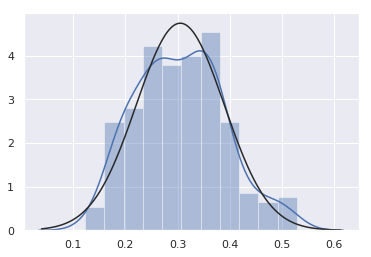

In [182]:
sns.distplot(f_ori, fit=norm, norm_hist=True)
# sns.distplot(f_ali, rug=False, hist=False, fit=norm)

- #### Bias score changes

In [245]:
o_es_ori, o, F, M = cal_bias_paired(es_ori_E,  es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
print(f"in original ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")

# o_es_sup_en, o, F, M = cal_bias_paired(es_sup_en_E, es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
# print(f"in en-ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")

o_es_ali, o, F, M = cal_bias_paired(es_ali_E, es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
print(f"in aligned ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")

o_es_sup_de, o, F, M = cal_bias_paired(es_sup_de_E,es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
print(f"in de-ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")

# o_es_sup_fr, o, F, M = cal_bias_paired(es_sup_fr_E,es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
# print(f"in fr-ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")

o_es_sup_endeb, o, F, M = cal_bias_paired(es_sup_endeb_E, es_occ_def_m, es_occ_def_f, None, es_gender_pairs)
print(f"in endeb-ES, average bias:{o}, avg F_bias:{F}, avg M_bias:{M}")


in original ES, average bias:0.08032530358274752, avg F_bias:0.0, avg M_bias:0.0
in aligned ES, average bias:0.08891596550644666, avg F_bias:0.0, avg M_bias:0.0
in de-ES, average bias:0.06340341033160872, avg F_bias:0.0, avg M_bias:0.0
in endeb-ES, average bias:0.06649101964532406, avg F_bias:0.0, avg M_bias:0.0


In [246]:
scipy.stats.ttest_ind(o_es_ori, o_es_ali)

Ttest_indResult(statistic=-2.040347658109655, pvalue=0.04184055027641032)

In [247]:
scipy.stats.ttest_ind(o_es_ori, o_es_sup_de)

Ttest_indResult(statistic=4.961198471930474, pvalue=9.618954015293024e-07)

In [191]:
scipy.stats.ttest_ind(o_es_ori, o_es_sup_fr)

Ttest_indResult(statistic=4.2854580775611835, pvalue=2.1883326360217304e-05)

In [248]:
scipy.stats.ttest_ind(o_es_ori, o_es_sup_endeb)

Ttest_indResult(statistic=3.9167408611074874, pvalue=0.00010222515267355803)

- ## What kind of occupations will increase/decreas the bias

In [249]:
import pandas as pd

In [250]:
def get_lan_dict(f_file, m_file):
    es2en_m = {}
    es2en_f = {}
    en2es_m = {}
    en2es_f = {}
    es_ms = []
    es_fs = []
    with open(f_file, 'r') as es_f, open(m_file, 'r') as es_m:
            for line in es_f.readlines():
                tokens = line.strip().split('\t')
                if tokens[0].lower() not in en_occ_def_f:
                    print("wrong line:", tokens)
                    break
                es2en_f[tokens[1].lower()]=tokens[0]
                en2es_f[tokens[0]]=tokens[1].lower()
                es_fs.append(tokens[1].lower())
            for line in es_m.readlines():
                tokens = line.strip().split('\t')
                if tokens[0].lower() not in en_occ_def_m:
                    print("wrong line:", tokens)
                    break
                es2en_m[tokens[1].lower()]=tokens[0]
                en2es_m[tokens[0]]=tokens[1].lower()
                es_ms.append(tokens[1].lower())
    return es2en_m, es2en_f, en2es_m, en2es_f, es_ms, es_fs

In [251]:
es2en_m, es2en_f, en2es_m, en2es_f, es_m, es_f = get_lan_dict('es_female_def_occ', 'es_male_def_occ')
de2en_m, de2en_f, en2de_m, en2de_f, de_m, de_f = get_lan_dict('de_female_def_occ', 'de_male_def_occ')
fr2en_m, fr2en_f, en2fr_m, en2fr_f, fr_m, fr_f = get_lan_dict('fr_female_def_occ', 'fr_male_def_occ')

In [253]:
commons = []
for idx in range(len(fr_m)):
    if es_m[idx] in es_ori_E.words and es_f[idx] in es_ori_E.words: #and de_m[idx] in de_ori_E.words \
#     and de_f[idx] in de_ori_E.words and fr_m[idx] in fr_ori_E.words and fr_f[idx] in fr_ori_E.words:
        commons.append(idx)

In [254]:
len(es_m), len(de_m), len(commons)

(257, 257, 251)

In [255]:
def split_occs(es_occ_def_f, es_occ_def_m, gender_def_pairs, ori_E, ali_E,\
               anchor_E, anchor_m, anchor_f, anchor_gender_pairs, commons=commons):
    increased = []
    decreased = []
    assert len(es_occ_def_f) == len(es_occ_def_m)
    for idx in commons:
        dis_ori = np.average([dis(ori_E, es_occ_def_m[idx], m) - dis(ori_E, es_occ_def_f[idx], f)\
                             for f,m in gender_def_pairs])
        dis_ali = np.average([dis(ali_E, es_occ_def_m[idx], m) - dis(ali_E, es_occ_def_f[idx], f)\
                             for f,m in gender_def_pairs])
        m_anchor = anchor_m[idx]
        f_anchor = anchor_f[idx]
        if m_anchor in anchor_E.words and f_anchor in anchor_E.words:
            dis_anchor = np.average([dis(anchor_E ,m_anchor , m) \
                                         - dis(anchor_E, f_anchor, f) \
                                     for f,m in anchor_gender_pairs])
        else:
            dis_anchor = np.nan
        if abs(dis_ori) < abs(dis_ali):
            increased.append([idx, en_occ_def_m[idx], en_occ_def_f[idx],\
                              dis_ori, dis_ali, dis_anchor])
        elif abs(dis_ori) > abs(dis_ali):
            decreased.append([idx, en_occ_def_m[idx], en_occ_def_f[idx],\
                              dis_ori, dis_ali, dis_anchor])
            
    print(f'{len(increased)} occs increased the bias; {len(decreased)} decreased')
    return increased, decreased

In [256]:
es_increased, es_decreased = split_occs(es_f, es_m, es_gender_pairs, es_ori_E, es_ali_E,\
                                       en_ori_E, en_occ_def_m, en_occ_def_f, gender_pairs)

157 occs increased the bias; 94 decreased


In [257]:
df = pd.DataFrame(es_increased + es_decreased, columns=['id', 'm','f', 'ori_bias', 'ali_bias', 'anchor_bias'])
#bias got amplified
df_amp = pd.DataFrame(es_increased, columns=['id', 'm','f', 'ori_bias', 'ali_bias', 'anchor_bias'])

In [266]:
df.sort_values(by = 'ori_bias')

,id,m,f,ori_bias,ali_bias,anchor_bias
173,57,beau,belle,-0.162123,-0.140511,0.025935
99,151,postman,postwoman,-0.133766,-0.185884,0.110867
40,62,beaus,belles,-0.128713,-0.136461,-0.006018
55,82,blokes,wenches,-0.124219,-0.146047,0.055112
33,47,androgen,estrogen,-0.123176,-0.155655,0.073290
98,149,mechanic,mechanic,-0.108763,-0.141681,-0.051031
191,113,bloke,wench,-0.101702,-0.091975,0.092601
115,180,farmer,farmer,-0.084694,-0.096565,-0.040774
112,173,mobster,mobster,-0.083408,-0.123117,-0.052638
179,69,cameraman,camerawoman,-0.082630,-0.074713,0.089095


In [259]:
# in anchor language, overall, how many occupations are biased to male
df[df['anchor_bias'] < 0].describe()

,id,ori_bias,ali_bias,anchor_bias
count,87.000000,87.000000,87.000000,87.000000
mean,176.229885,0.030374,0.026857,-0.026659
std,56.064892,0.068489,0.084725,0.017383
min,9.000000,-0.128713,-0.141681,-0.089541
25%,153.000000,-0.024356,-0.034045,-0.038587
50%,188.000000,0.031627,0.022256,-0.025215
75%,213.500000,0.075292,0.077445,-0.011818
max,255.000000,0.271265,0.368273,-0.000267


In [260]:
df1 = df[df['ori_bias'] < df['anchor_bias']] #128
df2 = df1[df1['ori_bias'] < df1['ali_bias']] #67
# df2[df2['anchor_bias']>0] #65

In [261]:
df_amp_further = df_amp[abs(df_amp['anchor_bias'] - df_amp['ali_bias'])\
      > abs(df_amp['anchor_bias'] - df_amp['ori_bias'])]
df_amp_closer = df_amp[abs(df_amp['anchor_bias'] - df_amp['ali_bias'])\
      < abs(df_amp['anchor_bias'] - df_amp['ori_bias'])]
print(f'Among bias amplified occupations:\n\
    {len(df_amp_closer)} have a closer bias score to the anchor bias\n\
    {len(df_amp_further)} have a bias score farther away from the anchor bias')

Among bias amplified occupations:
    51 have a closer bias score to the anchor bias
    106 have a bias score farther away from the anchor bias


In [262]:
df_amp_closer_same_bias_trend = df_amp_closer[df_amp_closer['anchor_bias'] \
                                   * df_amp_closer['ori_bias'] > 0].reset_index()
print(f'Among {len(df_amp_closer)} bias amplified and closer bias score:\n \
    {len(df_amp_closer_same_bias_trend)} share the same overall male/female bias trend')

Among 51 bias amplified and closer bias score:
     49 share the same overall male/female bias trend


In [263]:
df_amp_further_same_bias_trend = df_amp_further[df_amp_further['anchor_bias'] \
                                   * df_amp_further['ori_bias'] > 0].reset_index()
print(f'Among {len(df_amp_further)} bias amplified and further bias score:\n \
    {len(df_amp_further_same_bias_trend)} share the same overall male/female bias trend')

Among 106 bias amplified and further bias score:
     63 share the same overall male/female bias trend


In [791]:
es_increased_sup_de, es_decreased_sup_de = split_occs(es_f, es_m, \
                                                      es_gender_pairs, es_ori_E, es_sup_de_E,\
                                                     de_ori_E, de_m, de_f, de_gender_pairs)

60 occs increased the bias; 151 decreased


In [792]:
df_es_de = pd.DataFrame(es_increased_sup_de + es_decreased_sup_de, \
                        columns=['id', 'm','f', 'ori_bias', 'ali_bias', 'anchor_bias'])
#bias got amplified
df_es_de_amp = df_es_de.loc[:len(es_increased_sup_de) - 1,:]

In [599]:
len(df_es_de), len(df)

(211, 211)

In [600]:
# in anchor language (DE), overall, how many occupations are biased to male
df_es_de[df_es_de['anchor_bias'] < 0].describe()

,ori_bias,ali_bias,anchor_bias
count,28.000000,28.000000,28.000000
mean,0.027523,0.020729,-0.041724
std,0.101516,0.076856,0.040215
min,-0.162123,-0.120039,-0.147122
25%,-0.020778,-0.022380,-0.053982
50%,0.023730,0.021429,-0.030153
75%,0.059163,0.061706,-0.013407
max,0.420151,0.307894,-0.000457


In [601]:
def get_shift(df):
    df_further = df[abs(df['anchor_bias'] - df['ali_bias'])\
          > abs(df['anchor_bias'] - df['ori_bias'])]
    df_closer = df[abs(df['anchor_bias'] - df['ali_bias'])\
          < abs(df['anchor_bias'] - df['ori_bias'])]
    print(f'Among bias amplified occupations:\n\
        {len(df_closer)} have a closer bias score to the anchor bias\n\
        {len(df_further)} have a bias score farther away from the anchor bias')
    return df_further, df_closer

In [602]:
df_es2de_amp_further, df_es2de_amp_closer = get_shift(df_es_de_amp)

Among bias amplified occupations:
        20 have a closer bias score to the anchor bias
        40 have a bias score farther away from the anchor bias


In [603]:
df_es2de_dec = df_es_de.loc[len(es_increased_sup_de):,:]
df_es2de_dec_further, df_es2de_dec_closer = get_shift(df_es2de_dec)

Among bias amplified occupations:
        63 have a closer bias score to the anchor bias
        88 have a bias score farther away from the anchor bias


In [604]:
df_es2de_amp_closer_same_bias_trend = df_es2de_amp_closer[df_es2de_amp_closer['anchor_bias'] \
                                   * df_es2de_amp_closer['ori_bias'] > 0].reset_index()
print(f'Among {len(df_es2de_amp_closer)} bias amplified and closer bias score:\n \
    {len(df_es2de_amp_closer_same_bias_trend)} share the same overall male/female bias trend')

Among 20 bias amplified and closer bias score:
     14 share the same overall male/female bias trend


In [605]:
df_amp_further_same_bias_trend = df_es2de_dec_further[df_es2de_dec_further['anchor_bias'] \
                                   * df_es2de_dec_further['ori_bias'] > 0].reset_index()
print(f'Among {len(df_es2de_dec_further)} bias amplified and further bias score:\n \
    {len(df_amp_further_same_bias_trend)} share the same overall male/female bias trend')

Among 88 bias amplified and further bias score:
     88 share the same overall male/female bias trend


In [788]:
es_increased_sup_fr, es_decreased_sup_fr = split_occs(es_f, es_m, \
                                                      es_gender_pairs, es_ori_E, es_sup_fr_E,\
                                                     fr_ori_E, fr_m, fr_f, fr_gender_pairs)

76 occs increased the bias; 135 decreased


In [789]:
df_es_fr = pd.DataFrame(es_increased_sup_fr + es_decreased_sup_fr, \
                        columns=['id', 'm','f', 'ori_bias', 'ali_bias', 'anchor_bias'])
#bias got amplified
df_es_fr_amp = df_es_fr.loc[:len(es_increased_sup_fr) - 1,:]

In [790]:
# in anchor language (fr), overall, how many occupations are biased to male
df_es_fr[df_es_fr['anchor_bias'] < 0].describe()

,id,ori_bias,ali_bias,anchor_bias
count,48.000000,48.000000,48.000000,48.000000
mean,153.979167,0.011570,-0.014771,-0.027270
std,68.384859,0.069608,0.070602,0.023639
min,9.000000,-0.162123,-0.133334,-0.091510
25%,101.500000,-0.029083,-0.059395,-0.039448
50%,170.000000,-0.002463,-0.021242,-0.022110
75%,209.750000,0.048998,0.011595,-0.006570
max,245.000000,0.172018,0.248613,-0.000061


In [610]:
df_es2fr_amp_further, df_es2fr_amp_closer = get_shift(df_es_fr_amp)

Among bias amplified occupations:
        12 have a closer bias score to the anchor bias
        64 have a bias score farther away from the anchor bias


In [793]:
df_all1 = df.merge(df_es_de, on=['id', 'm', 'f', 'ori_bias'], \
                   suffixes=('_EN', '_DE'), how='inner').drop_duplicates()
df_all = df_all1.merge(df_es_fr, on=['id', 'm', 'f', 'ori_bias'],\
                      suffixes=['', '_FR'], how='inner').drop_duplicates()
df_all = df_all.dropna()

In [794]:
df_en_gender_specific=df_all[df_all['m'] != df_all['f']]
df_en_gender_same = df_all[df_all['m'] == df_all['f']]

In [795]:
df_en_gender_specific.describe()

,id,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,69.739496,0.061636,0.070547,0.087452,0.044843,0.075958,0.033529,0.068607
std,39.774249,0.075622,0.089251,0.067238,0.060100,0.085612,0.075801,0.077782
min,0.000000,-0.162123,-0.155655,-0.089541,-0.120039,-0.147122,-0.181740,-0.091510
25%,34.500000,0.023819,0.018286,0.049810,0.012001,0.014677,-0.004355,0.024169
50%,72.000000,0.069640,0.080012,0.089095,0.049258,0.079647,0.027884,0.064174
75%,103.500000,0.102930,0.112824,0.123377,0.074642,0.129571,0.058050,0.106141
max,136.000000,0.420151,0.467355,0.286472,0.307894,0.354059,0.377899,0.445419


In [796]:
#words like doctor, nurse
df_en_gender_same.describe()

,id,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,205.836957,0.034554,0.030957,-0.007703,0.022433,0.087731,-0.009959,0.033870
std,30.856021,0.058568,0.068110,0.037206,0.045147,0.042722,0.049362,0.050351
min,137.000000,-0.084694,-0.123117,-0.068968,-0.070408,-0.070320,-0.121471,-0.059657
25%,179.750000,-0.013613,-0.014271,-0.033926,-0.009781,0.063334,-0.041390,-0.006220
50%,208.500000,0.038345,0.027324,-0.016787,0.025184,0.093294,-0.010248,0.025476
75%,232.250000,0.075743,0.079347,0.007795,0.050766,0.111815,0.017275,0.070105
max,256.000000,0.162228,0.186884,0.147327,0.122307,0.192669,0.138737,0.163445


In [797]:
df_all.describe()

,id,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,129.080569,0.049828,0.053285,0.045963,0.035072,0.081091,0.014567,0.053461
std,76.668104,0.069864,0.082907,0.073331,0.055109,0.070311,0.068932,0.069255
min,0.000000,-0.162123,-0.155655,-0.089541,-0.120039,-0.147122,-0.181740,-0.091510
25%,64.500000,0.002223,-0.001438,-0.016999,-0.003251,0.045877,-0.027692,0.005280
50%,122.000000,0.058222,0.059066,0.031327,0.038872,0.088974,0.011794,0.049728
75%,200.500000,0.095498,0.102563,0.096264,0.066577,0.120471,0.045990,0.086676
max,256.000000,0.420151,0.467355,0.286472,0.307894,0.354059,0.377899,0.445419


In [632]:
df_a1 = df_all[(abs(df_all['ori_bias'])< abs(df_all['anchor_bias_DE'])) & \
       (abs(df_all['ori_bias'])<abs(df_all['anchor_bias']))] #76
df_a2=df_a1[(abs(df_a1['ori_bias'])>abs(df_a1['ali_bias_DE'])) & \
     (abs(df_a1['ori_bias'])>abs(df_a1['ali_bias']))].reset_index() #31
df_a3=df_a1[(abs(df_a1['ori_bias'])>abs(df_a1['ali_bias_DE'])) | \
     (abs(df_a1['ori_bias'])>abs(df_a1['ali_bias']))].reset_index() #53
df_a4 = df_a1[(abs(df_a1['ori_bias'])>abs(df_a1['ali_bias_DE'])) & \
     (abs(df_a1['ori_bias'])>abs(df_a1['ali_bias'])) &\
     df_a1['ori_bias']<0].reset_index() #0: original biased to male; 
     #then after alignment, in both cases, the bias goes down'''
df_a5 = df_a1[((abs(df_a1['ori_bias'])>abs(df_a1['ali_bias_DE'])) | \
     (abs(df_a1['ori_bias'])>abs(df_a1['ali_bias']))) &\
     df_a1['ori_bias']<0].reset_index() #0

,index,m,f,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias


In [702]:
df_biased_m = df_all[df_all['ori_bias']<0].reset_index()

In [707]:
# df2 = df_biased_m[df_biased_m['ori_bias'] < df_biased_m['anchor_bias_EN']].reset_index()
df_biased_m[(df_biased_m['ori_bias'] < df_biased_m['ali_bias_DE'])].reset_index()

,level_0,index,m,f,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias
0,3,30,androgen,estrogen,-0.123176,-0.155655,0.073290,-0.088824,0.020717,-0.181740,0.016476
1,4,35,beaus,belles,-0.128713,-0.136461,-0.006018,-0.078471,-0.031429,-0.054937,-0.030045
2,7,39,policeman,policewoman,-0.006523,-0.013898,0.079610,-0.004396,0.028274,0.000098,-0.054416
3,9,47,blokes,wenches,-0.124219,-0.146047,0.055112,-0.104548,0.354059,-0.084341,0.266044
4,11,64,beard,toque,-0.017688,-0.023882,-0.089541,0.010098,-0.093734,-0.001944,-0.091510
5,13,82,firefighter,firefighter,-0.054800,-0.091602,-0.017600,-0.044848,0.017496,-0.085817,-0.051377
6,14,83,butcher,butcher,-0.033170,-0.068470,-0.060728,-0.025879,-0.070320,-0.071081,-0.026123
7,17,93,mobster,mobster,-0.083408,-0.123117,-0.052638,-0.070408,0.165250,-0.121471,-0.039749
8,18,96,farmer,farmer,-0.084694,-0.096565,-0.040774,-0.065583,0.090665,-0.094603,0.031066
9,22,100,electrician,electrician,-0.013500,-0.027836,-0.038263,-0.010246,0.105973,-0.040815,0.013609


In [720]:
df_s = df_all[(df_all['ori_bias'] * df_all['anchor_bias_EN'] > 0) \
      & (df_all['ori_bias'] * df_all['anchor_bias_DE'] > 0)\
      & (df_all['ori_bias'] * df_all['anchor_bias'] > 0)].reset_index()
# df_s[abs(df_s['ori_bias']) < abs(df_s['ali_bias_EN'])].reset_index()

In [724]:
df_all['bias_diff'] = df_all['ali_bias_DE'] - df_all['ori_bias']

In [896]:
df_all.sort_values(by='ori_bias').tail(10)

,id,m,f,ori_bias,ali_bias_EN,anchor_bias_EN,ali_bias_DE,anchor_bias_DE,ali_bias,anchor_bias
28,43,bachelors,spinsters,0.145875,0.168404,0.187280,0.081667,-0.005133,0.113807,-0.060412
129,246,senator,senator,0.152712,0.186884,-0.007858,0.122307,0.083147,0.138737,0.066940
50,85,dudes,chicks,0.154577,0.203512,0.006364,0.105497,0.105806,0.248613,-0.012000
65,109,stewards,stewardesses,0.154744,0.172788,0.202449,0.102279,0.201723,0.112244,0.064643
25,40,tailor,seamstress,0.157379,0.191624,0.149601,0.152116,0.162859,0.089685,0.043230
180,177,president,president,0.162228,0.155212,-0.009537,0.103725,0.082658,0.105460,0.069782
27,42,dude,chick,0.172018,0.236238,-0.043526,0.113579,0.188248,0.196660,-0.039348
170,124,governor,governess,0.184915,0.176144,0.219602,0.125251,0.171027,0.096493,0.222561
23,36,dudes,gals,0.271265,0.368273,-0.020711,0.203093,0.255520,0.315398,0.153651
45,79,chap,lass,0.420151,0.467355,0.058667,0.307894,-0.147122,0.377899,0.047959


In [844]:
en_occ_def_m[43], es_m[43]

('bachelors', 'solteros')

In [826]:
mf = df_all.sort_values(by='ori_bias').tail(5)['id'].tolist()
mm = df_all.sort_values(by='ori_bias').head(5)['id'].tolist()

In [956]:
titles = [x.strip() for x in \
          open('/tmp/t-jizhao/data/biosbias/BiosBias/EN/data/filtered_titles').readlines()]

In [279]:
def plot_titles(E, gender_pairs, titles_m, titles_f):
    gds = np.average([E.v(gender_pairs[idx][0]) - E.v(gender_pairs[idx][1]) for idx in range(len(gender_pairs))])
    gd = -we.doPCA(gender_pairs, E).components_[0]
    x = [np.dot(E.v(x), gd) for x in titles_m if x in E.words]
    gd1 = we.doPCA(gender_pairs, E).components_[1]
    y = [np.dot(E.v(x), gd1) for x in titles_m if x in E.words]
    plt.plot(x,y,'go')
    for idx in range(len(x)):
        if titles_m[idx] == 'arquitecto':
            plt.annotate(titles_m[idx], (x[idx]-0.053, y[idx]+0.005), fontsize=12)
            continue
        plt.annotate(titles_m[idx], (x[idx], y[idx]), fontsize=12)
        
    x2 = [np.dot(E.v(x), gd) for x in titles_f if x in E.words]
    y2 = [np.dot(E.v(x), gd1) for x in titles_f if x in E.words]
    plt.plot(x2,y2,'r<')
    for idx in range(len(x)):
#         if titles[idx] in ['architect', 'accountant', 'professor', 'surgeon']:
#             plt.annotate(titles_f[idx], (x2[idx]-0.05, y2[idx]), fontsize=12)
#             continue
#         if idx ==0 or idx==6 or idx==len(x) -1:
#             plt.annotate(titles_f[idx], (x2[idx]-0.03, y2[idx]), fontsize=12)
#             continue
        plt.annotate(titles_f[idx], (x2[idx], y2[idx]), fontsize=12)
    plt.savefig('es-ali_titles.pdf')
    plt.show()
    plt.close()

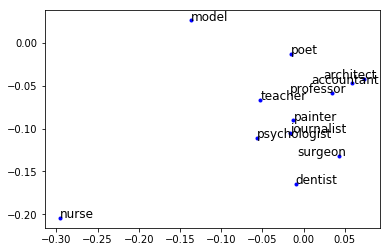

In [1062]:
plot_titles(en_ori_E, gender_pairs, titles, titles )

In [984]:
print({x:en2es[x] for x in titles})

{'poet': ['poeta', 'poetisa'], 'surgeon': ['cirujana', 'cirujano'], 'accountant': ['contable', 'contador'], 'professor': ['profesor', 'catedrático', 'profesora'], 'nurse': ['enfermera', 'enfermero'], 'teacher': ['maestra', 'profe', 'maestro', 'docente', 'profesor', 'profesora'], 'journalist': ['periodista'], 'psychologist': ['psicólogo', 'psicóloga'], 'architect': ['arquitecto', 'arquitectos'], 'model': ['modelos', 'maqueta', 'modelo'], 'painter': ['pintora', 'pintor'], 'dentist': ['dentistas', 'dentista']}


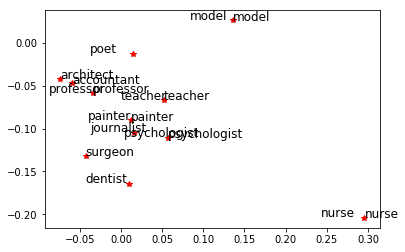

In [1029]:
plot_titles(en_ori_E, gender_pairs, titles, titles)

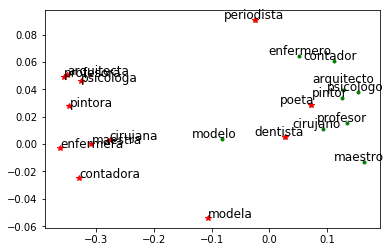

In [1072]:
es_titles_m = ['poeta', 'cirujano', 'contador','profesor', 'enfermero', 'maestro', 'periodista',\
              'psicólogo', 'arquitecto', 'modelo', 'pintor', 'dentista']
es_titles_f = ['poeta', 'cirujana', 'contadora','profesora', 'enfermera', 'maestra', 'periodista',\
              'psicóloga', 'arquitecta', 'modela', 'pintora', 'dentista']
plot_titles(es_ori_E, es_gender_pairs, es_titles_m, es_titles_f)

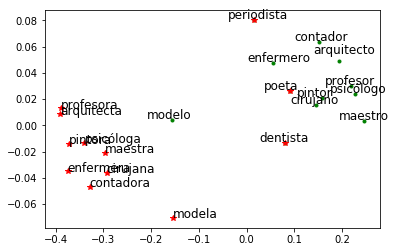

In [1078]:
plot_titles(es_ali_E, es_gender_pairs, es_titles_m, es_titles_f)

In [451]:
sns.reset_orig()

/local/jyzhao/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/local/jyzhao/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [326]:
m_f_w = [['beau', 'belle'],
         ['dudes', 'gals'],
         ['governor', 'governess'],
         ['dude', 'chick'],
         ['tailor', 'seamstress'],
         ['stewards', 'stewardesses'],
        ]

In [296]:
gender_pairs

[['woman', 'man'],
 ['girl', 'boy'],
 ['she', 'he'],
 ['mother', 'father'],
 ['daughter', 'son'],
 ['gal', 'guy'],
 ['female', 'male'],
 ['her', 'his'],
 ['mary', 'john']]

In [304]:
(en_ori_E.v(gender_pairs[0][0]) - en_ori_E.v(gender_pairs[0][1])).shape

(300,)

In [393]:
range(3)

range(0, 3)

In [495]:
es_gender_pairs

[['mujer', 'hombre'],
 ['chica', 'chico'],
 ['madre', 'padre'],
 ['hija', 'hijo'],
 ['femenino', 'masculino'],
 ['suya', 'suyo'],
 ['maría', 'juan'],
 ['niña', 'niño'],
 ['ella', 'él']]

In [535]:
def plot_titles_gd(E, gender_pairs, titles_m, titles_f):
    gd = np.average([(E.v(gender_pairs[idx][0]) - E.v(gender_pairs[idx][1])) for idx in range(len(gender_pairs))], axis = 0)
    x_m = [np.dot(E.v(x), gd) for x in titles_m if x in E.words]
    x_f = [np.dot(E.v(x), gd) for x in titles_f if x in E.words]
    x_seed_m = np.average([np.dot(E.v(x[1]), gd) for x in gender_pairs if x[1] in E.words])
    x_seed_f = np.average([np.dot(E.v(x[0]), gd) for x in gender_pairs if x[0] in E.words])
    y = [x for x in range(len(titles_m))]
    fig= plt.figure(figsize=(6.4,4.8))
    plt.xlim(-0.12, 0.17)
    plt.yticks([])
#     plt.autoscale(enable=True, axis='y', tight=True)
    plt.plot(x_m, y, 'go', label='Misc.')
    plt.plot(x_f, y, 'rs', label = 'Femi.')
    plt.plot(x_seed_m, np.average(y), 'gP', )
    plt.plot(x_seed_f, np.average(y), 'rD')
    plt.annotate('Avg-M', (x_seed_m-0.01, np.average(y)+0.15), fontsize=15)
    plt.annotate('Avg-F', (x_seed_f-0.03, np.average(y) + 0.15), fontsize=15)
    print(x_seed_m)
    for idx in range(len(titles_m)):
        if titles_m[idx] in ['stewards']:
            plt.annotate(titles_m[idx], (x_m[idx]-0.04, y[idx]-0.15), fontsize=15)
        else:
            plt.annotate(titles_m[idx], (x_m[idx]-0.02, y[idx]-0.2), fontsize=15)
        if titles_f[idx] in ['seamstress']:
            plt.annotate(titles_f[idx], (x_f[idx]-0.03, y[idx]-0.2), fontsize=15)
        elif titles_f[idx] in ['stewardesses']:
            plt.annotate(titles_f[idx], (x_f[idx]+0.003, y[idx]-0.3), fontsize=15)
        else:
            plt.annotate(titles_f[idx], (x_f[idx]-0.005, y[idx]-0.2), fontsize=15)
    plt.legend(fontsize=13)
    plt.savefig('es-de_titles.pdf')
    plt.show()
    plt.close()

-0.07034872


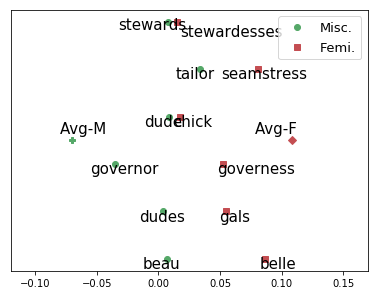

In [536]:
# plot_titles_gd(es_ori_E, es_gender_pairs, [x[0] for x in m_f_w], [x[1] for x in m_f_w])
# plot_titles_gd(es_ali_E, es_gender_pairs, [x[0] for x in m_f_w], [x[1] for x in m_f_w])
plot_titles_gd(es_sup_de_E, es_gender_pairs, [x[0] for x in m_f_w], [x[1] for x in m_f_w])
# plot_titles_gd(es_sup_endeb_E, es_gender_pairs, [x[0] for x in m_f_w], [x[1] for x in m_f_w])

In [576]:
import utils

In [289]:
import matplotlib.pyplot as plt

In [543]:
len(es_m),len(de_m),len(fr_m)

(257, 257, 257)

In [545]:
len(commons)

211

In [546]:
# with open('common_occ_idx_across_languages', 'w') as f:
#     for x in commons:
#         f.write(str(x) + '\n')

In [558]:
ids = random.sample(range(len(commons)), 15)

In [946]:

def plot_occ_along_gender_direction(E, occ_m, occ_f, gd, gender_pairs, commons, mf, ll):
    #occupation projection
    ori_proj_m = [np.dot(E.v(occ_m[x]), gd) for x in commons\
                  if occ_m[x] in E.words and occ_f[x] in E.words]
    ori_proj_f = [np.dot(E.v(occ_f[x]), gd) for x in commons \
                  if occ_m[x] in E.words and occ_f[x] in E.words]
    #gender seeds projection
    gender_m = np.average([np.dot(E.v(m), gd) for f,m in gender_pairs])
    gender_f = np.average([np.dot(E.v(f), gd) for f,m in gender_pairs])
    gd1 = we.doPCA(gender_pairs, E).components_[1]
    assert len(ori_proj_m) == len(ori_proj_f)
    y_m=[np.dot(E.v(occ_m[x]), gd1) for x in commons\
                  if occ_m[x] in E.words and occ_f[x] in E.words]
    y_f = [np.dot(E.v(occ_f[x]), gd1) for x in commons \
                  if occ_m[x] in E.words and occ_f[x] in E.words]
    gender_m1 = np.average([np.dot(E.v(m), gd1) for f,m in gender_pairs])
    gender_f1 = np.average([np.dot(E.v(f), gd1) for f,m in gender_pairs])
    avg_proj_m = np.average(ori_proj_m)
    avg_proj_f = np.average(ori_proj_f)
    print(f'PCA_0, avg m/f projection: {avg_proj_m}, {avg_proj_f}')
    print(f'PCA_1, avg m/f projection: {np.average(y_m)}, {np.average(y_f)}')
#     print(f'PCA_0, dis(avg m_occs proj, avg m_seeds proj):{avg_proj_m - gender_m}')
#     print(f'PCA_0, dis(avg f_occs proj, avg f_seeds proj):{avg_proj_f - gender_f}')
    
    plt.plot(ori_proj_f, y_f, 'r.')
#     plt.plot(avg_proj_f, np.average(y_f), 'b*', markersize=10)
#     print(f'on PCA_1, dis(avg m_occs proj, avg m_seeds proj):{np.average(y_m) - gender_m1}')
#     print(f'on PCA_1, dis(avg f_occs proj, avg f_seeds proj):{np.average(y_f) - gender_f1}')
    
#     plt.plot(gender_f, gender_f1, '<', color='black', markersize=10)
#     plt.xlim([-0.5, 0.5])
#     plt.ylim([-0.3, 0.3])
    
#     plt.axvline(gender_f, linestyle='--', color='blue')
    for idx in mf:
        plt.annotate(occ_f[mf.index(idx)], \
                     (ori_proj_f[mf.index(idx)], y_f[mf.index(idx)]), \
                     color='black', fontsize=12)
        plt.plot(ori_proj_f[mf.index(idx)], y_f[mf.index(idx)],'r*', markersize=10)
#     plt.show()
#     plt.close()
    plt.xlim([-0.48, 0.31])
    plt.ylim([-0.17, 0.2])
    plt.plot(np.array(ori_proj_m), y_m, 'g.')
    
#     plt.axvline(gender_m,linestyle='--', color='blue')
    for idx in mf:
        if idx != 177:
            plt.annotate(occ_m[mf.index(idx)], \
                         (ori_proj_m[mf.index(idx)] -0.03, y_m[mf.index(idx)] + 0.01),\
                         color='black', fontsize=12)
        else:
            plt.annotate(occ_m[mf.index(idx)], \
                         (ori_proj_m[mf.index(idx)] -0.07, y_m[mf.index(idx)] - 0.02),\
                         color='black', fontsize=12)
        plt.plot(ori_proj_m[mf.index(idx)], y_m[mf.index(idx)],'g*', markersize=10)
#     plt.plot(avg_proj_m, np.average(y_m), 'b*', markersize=10)
#     plt.plot(gender_m, gender_m1, '<', color='black', markersize=10)
    plt.savefig(f'most_biased_in_{ll}.pdf')
    plt.show()
    plt.close()
    

PCA_0, avg m/f projection: 0.05823809280991554, -0.19593816995620728
PCA_1, avg m/f projection: 0.01729809120297432, 0.008702527731657028


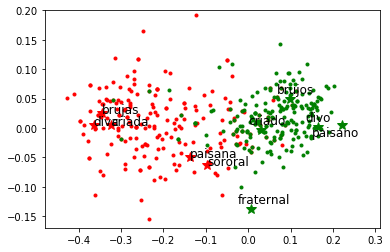

In [947]:
plot_occ_along_gender_direction(es_ori_E, es_m, es_f, es_ori_gd, es_gender_pairs, commons, mf, 'ori_ES')

PCA_0, avg m/f projection: 0.030455462634563446, -0.11775766313076019
PCA_1, avg m/f projection: -0.05313258618116379, -0.08662819862365723


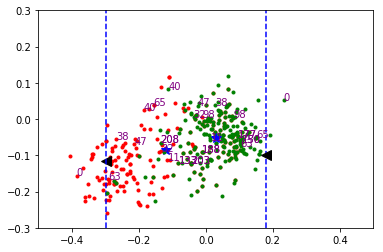

In [684]:
plot_occ_along_gender_direction(en_ori_E, en_occ_def_m, en_occ_def_f, -en_ori_gd, gender_pairs, commons)

PCA_0, avg m/f projection: 0.046463556587696075, -0.07083047181367874
PCA_1, avg m/f projection: 0.04985884204506874, 0.08752194792032242


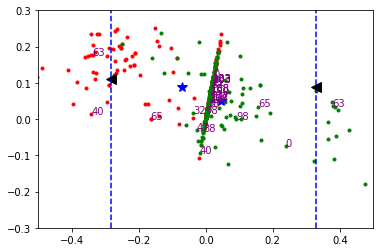

In [685]:
plot_occ_along_gender_direction(en_deb_E, en_occ_def_m, en_occ_def_f, en_deb_gd, gender_pairs, commons, )

PCA_0, avg m/f projection: 0.0804513692855835, -0.21867267787456512
PCA_1, avg m/f projection: 0.014487171545624733, -0.011783742345869541


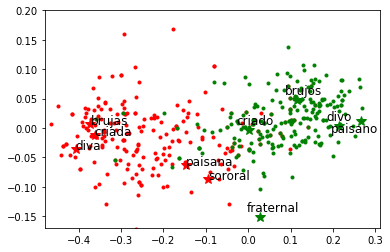

In [948]:
plot_occ_along_gender_direction(es_ali_E, es_m, es_f, -es_ali_gd, es_gender_pairs, commons, mf, 'es_ali_E')

PCA_0, avg m/f projection: 0.061611298471689224, -0.1860976666212082
PCA_1, avg m/f projection: 0.0029184999875724316, -0.030985664576292038


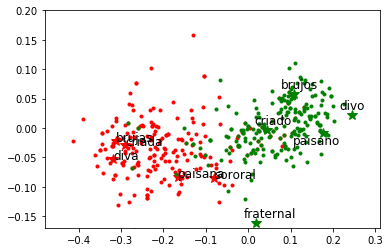

In [949]:
plot_occ_along_gender_direction(es_sup_de_E, es_m, es_f, -es_sup_de_gd, es_gender_pairs,commons, mf, 'es_sup_de_E')

PCA_0, avg m/f projection: 0.04987146332859993, -0.18472687900066376
PCA_1, avg m/f projection: 0.017217276617884636, -0.1470630019903183


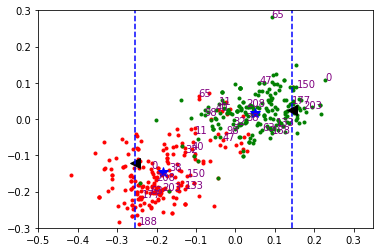

In [677]:
plot_occ_along_gender_direction(de_ori_E, de_m, de_f, -de_ori_gd, de_gender_pairs, commons)

PCA_0, avg m/f projection: 0.10292105376720428, -0.17410385608673096
PCA_1, avg m/f projection: 0.011215873062610626, 0.012026650831103325


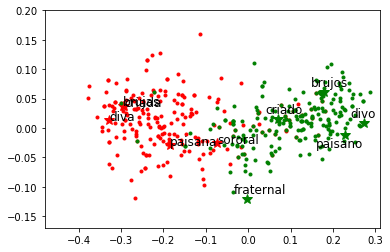

In [950]:
plot_occ_along_gender_direction(es_sup_fr_E, es_m, es_f, -es_sup_fr_gd, es_gender_pairs, commons, mf, 'es_sup_fr_E')

PCA_0, avg m/f projection: 0.00954345054924488, -0.18984584510326385
PCA_1, avg m/f projection: -0.06782159954309464, -0.108587346971035


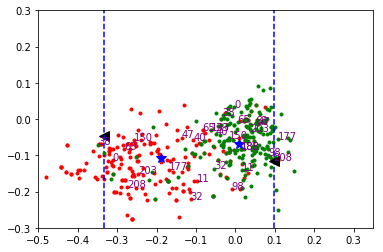

In [679]:
plot_occ_along_gender_direction(fr_ori_E, fr_m, fr_f, -fr_ori_gd, fr_gender_pairs, commons)

In [680]:
fr_dis_m = []
fr_dis_f = []
for x in range(len(fr_m)):
    if fr_m[x] not in fr_ori_E.words or fr_f[x] not in fr_ori_E.words:
        continue
    dis_m = np.average([dis(fr_ori_E, fr_m[x], m) for f,m in fr_gender_pairs])
    dis_f = np.average([dis(fr_ori_E, fr_f[x], f) for f,m in fr_gender_pairs])
    fr_dis_m.append(dis_m)
    fr_dis_f.append(dis_f)


In [681]:
fr_ids = np.array(fr_dis_m) - np.array(fr_dis_f)

In [463]:
fr_ids.mean()

0.04914031712306289

In [443]:
len(fr_ids)

239

In [297]:
np.average(ori_proj_m-gender_m), np.average(ori_proj_f-gender_f)

(-0.11311131, 0.10660661)

In [ ]:
ori_dis_m = [dis(es_ori_E, es_m[x], es_ori_gd) for x in range(len(es_m)) if es_m[x] in es_ori_E.words\
             and es_f[x] in es_ori_E.words]

In [292]:
es_gender_pairs

[['mujer', 'hombre'],
 ['chica', 'chico'],
 ['madre', 'padre'],
 ['hija', 'hijo'],
 ['femenino', 'masculino'],
 ['suya', 'suyo'],
 ['maría', 'juan'],
 ['niña', 'niño'],
 ['ella', 'él']]

----
----


# Bias in German

In [38]:
%xdel de_ori_E

NameError: name 'de_ori_E' is not defined


In [40]:
%reset de_ori_E

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Don't know how to reset  de_ori_e, please run `%reset?` for details


In [146]:
de_ori_file = '/tmp/t-jizhao/data/fasttext/wiki.de.vec'
de_ali_file = '/tmp/t-jizhao/data/fasttext/wiki.de.align.vec'

In [147]:
de_ori_E = we.WordEmbedding(de_ori_file)
de_ali_E = we.WordEmbedding(de_ali_file)

1138it [00:00, 11375.78it/s]

*** Reading data from /tmp/t-jizhao/data/fasttext/wiki.de.vec


2275233it [03:23, 11192.38it/s]


(2275233, 300)
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine


In [152]:
de_gender_pairs = json.load(open('de_gender_pairs.json'))

In [130]:
de_sup_en_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.de-en.vec'
de_sup_es_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.de-es.vec'
de_sup_fr_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.de-fr.vec'

In [131]:
de_sup_en_E = we.WordEmbedding(de_sup_en_file)

1237it [00:00, 12361.20it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.de-en.vec


2275233it [03:10, 11954.98it/s]


(2275233, 300)
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine


In [132]:
de_sup_es_E = we.WordEmbedding(de_sup_es_file)
de_sup_fr_E = we.WordEmbedding(de_sup_fr_file)

1230it [00:00, 12297.02it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.de-es.vec


2275233it [03:09, 12010.33it/s]


(2275233, 300)
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine


1236it [00:00, 12357.39it/s]

2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine
*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.de-fr.vec


2275233it [03:07, 12107.57it/s]


(2275233, 300)
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine
2275233 words of dimension 300 : ., ,, </s>, -, ..., stevenisten, forstén, sandener, batrachotoxine


In [ ]:
de_sup_endeb_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.de-en_debias.vec'
de_sup_endeb_E = we.WordEmbedding(de_sup_endeb_file)

1249it [00:00, 12489.09it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.de-en_debias.vec


1948221it [02:40, 11886.11it/s]

In [332]:
de_ori_gd = we.doPCA(de_gender_pairs, de_ori_E).components_[0]

In [78]:
de_sup_en_gd = we.doPCA(de_gender_pairs, de_sup_en_E).components_[0]
de_sup_es_gd = we.doPCA(de_gender_pairs, de_sup_es_E).components_[0]
de_sup_fr_gd = we.doPCA(de_gender_pairs, de_sup_fr_E).components_[0]

In [51]:
de_occ_def_f, de_occ_def_m = read_occs('de_female_def_occ', 'de_male_def_occ', de_ori_E)

NameError: name 'de_ori_E' is not defined

In [172]:
O_de_ori, O, F, M = cal_bias_paired(de_ori_E, de_occ_def_m, de_occ_def_f, en_occ_def_f, de_gender_pairs)
print(f"in original DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_de_ali, O, F, M = cal_bias_paired(de_ali_E, de_occ_def_m, de_occ_def_f, None, de_gender_pairs)
print(f"in aligned DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in original DE, average bias:0.1078576301937951, avg F_bias:0.0, avg M_bias:0.0
in aligned DE, average bias:0.11231789523047293, avg F_bias:0.0, avg M_bias:0.0


In [136]:
scipy.stats.ttest_ind(O_de_ori, O_de_ali)

Ttest_indResult(statistic=-1.0409554022584067, pvalue=0.29845271602497)

In [137]:
O_de_sup_en, O, F, M = cal_bias_paired(de_sup_en_E, de_occ_def_m, de_occ_def_f, en_occ_def_f, de_gender_pairs)
print(f"in sup-en DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in sup-en DE, average bias:0.08765684812166968, avg F_bias:0.0, avg M_bias:0.0


In [138]:
scipy.stats.ttest_ind(O_de_ori, O_de_sup_en)

Ttest_indResult(statistic=5.469663949007212, pvalue=7.477452068240268e-08)

In [139]:
O_de_sup_es, O, F, M = cal_bias_paired(de_sup_es_E, de_occ_def_m, de_occ_def_f, en_occ_def_f, de_gender_pairs)
print(f"in sup-es DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_de_sup_fr, O, F, M = cal_bias_paired(de_sup_fr_E, de_occ_def_m, de_occ_def_f, en_occ_def_f, de_gender_pairs)
print(f"in sup-fr DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in sup-es DE, average bias:0.07143628003547078, avg F_bias:0.0, avg M_bias:0.0
in sup-fr DE, average bias:0.08029276101949807, avg F_bias:0.0, avg M_bias:0.0


In [140]:
scipy.stats.ttest_ind(O_de_ori, O_de_sup_es), scipy.stats.ttest_ind(O_de_ori, O_de_sup_fr)

(Ttest_indResult(statistic=10.12971078371397, pvalue=7.182804559628826e-22),
 Ttest_indResult(statistic=7.2810127463764704, pvalue=1.4813705819116032e-12))

In [141]:
O_de_sup_endeb, O, F, M = cal_bias_paired(de_sup_endeb_E, de_occ_def_m, de_occ_def_f, None, de_gender_pairs)
print(f"in sup-endeb DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in sup-endeb DE, average bias:0.08409327246354482, avg F_bias:0.0, avg M_bias:0.0


In [142]:
scipy.stats.ttest_ind(O_de_ori, O_de_sup_endeb)

Ttest_indResult(statistic=6.497983114338624, pvalue=2.1535633137820797e-10)

---
# Test French

In [218]:
fr_ori_file = '/home/t-jizhao/Github/data/fasttext/wiki.fr.vec'
fr_ali_file = '/home/t-jizhao/Github/data/fasttext/wiki.fr.align.vec'

In [219]:
fr_ori_E = we.WordEmbedding(fr_ori_file)
# fr_ali_E = we.WordEmbedding(fr_ali_file)

1103it [00:00, 11025.15it/s]

*** Reading data from /home/t-jizhao/Github/data/fasttext/wiki.fr.vec


1152449it [01:42, 11249.30it/s]


(1152449, 300)
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat


In [148]:
# fr_gender_pairs = [['femme', 'homme'], ['fille', 'garçon'], ['elle', 'il'], ['mère', 'pére'],
#                   ['fille', 'fils'], ['gal', 'gars'], ['femelle', 'mâle'], ['sa', 'son'], ['marie', 'jean']]

In [220]:
fr_gender_pairs = json.load(open('fr_gender_pairs.json'))

In [152]:
fr_sup_es_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.fr-es.vec' 
fr_sup_es_E = we.WordEmbedding(fr_sup_es_file)
# fr_sup_es_gd = we.doPCA(fr_gender_pairs, fr_sup_es_E).components_[0]

1188it [00:00, 11875.20it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.fr-es.vec


1152449it [01:36, 11921.99it/s]


(1152449, 300)
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat


In [153]:
fr_sup_de_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.fr-de.vec' 
fr_sup_de_E = we.WordEmbedding(fr_sup_de_file)
# fr_sup_es_gd = we.doPCA(fr_gender_pairs, fr_sup_es_E).components_[0]

1252it [00:00, 12510.85it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.fr-de.vec


1152449it [01:36, 12000.11it/s]


(1152449, 300)
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat


In [154]:
fr_sup_en_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.fr-en.vec' 
fr_sup_en_E = we.WordEmbedding(fr_sup_en_file)

1125it [00:00, 11249.88it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.fr-en.vec


1152449it [01:36, 11970.53it/s]


(1152449, 300)
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat


In [155]:
fr_sup_endeb_file = '/tmp/t-jizhao/fastText/alignment/res/wiki.fr-en_debias.vec' 
fr_sup_endeb_E = we.WordEmbedding(fr_sup_endeb_file)

1105it [00:00, 11046.74it/s]

*** Reading data from /tmp/t-jizhao/fastText/alignment/res/wiki.fr-en_debias.vec


1152449it [01:36, 11939.59it/s]


(1152449, 300)
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat
1152449 words of dimension 300 : </s>, ,, de, ', ..., #détecteur, damno, ehrengabe, concentrat


In [331]:
fr_sup_es_gd = we.doPCA(fr_gender_pairs, fr_sup_es_E).components_[0]
fr_sup_de_gd = we.doPCA(fr_gender_pairs, fr_sup_de_E).components_[0]
fr_sup_en_gd = we.doPCA(fr_gender_pairs, fr_sup_en_E).components_[0]
fr_ori_gd = we.doPCA(fr_gender_pairs, fr_ori_E).components_[0]

In [157]:
fr_occ_def_f, fr_occ_def_m = read_occs('fr_female_def_occ', 'fr_male_def_occ', fr_ori_E)

257 257
238 pairs in the embeddings


In [166]:
O_fr_ori, O, F, M = cal_bias_paired(fr_ori_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in original fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")
O_fr_ali, O, F, M = cal_bias_paired(fr_ali_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in aligned DE, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in original fr, average bias:0.09350780224519756, avg F_bias:0.0, avg M_bias:0.0
in aligned DE, average bias:0.10222814558723348, avg F_bias:0.0, avg M_bias:0.0


In [161]:
O_fr_sup_en, O, F, M = cal_bias_paired(fr_sup_en_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in -en fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -en fr, average bias:0.08964900948962912, avg F_bias:0.0, avg M_bias:0.0


In [162]:
O_fr_sup_es, O, F, M = cal_bias_paired(fr_sup_es_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in -es fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -es fr, average bias:0.07639813057932199, avg F_bias:0.0, avg M_bias:0.0


In [163]:
O_fr_sup_de, O, F, M = cal_bias_paired(fr_sup_de_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in -de fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -de fr, average bias:0.07752567914381525, avg F_bias:0.0, avg M_bias:0.0


In [164]:
O_fr_sup_endeb, O, F, M = cal_bias_paired(fr_sup_endeb_E, fr_occ_def_m, fr_occ_def_f, None, fr_gender_pairs)
print(f"in -endeb fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -endeb fr, average bias:0.09178402996252454, avg F_bias:0.0, avg M_bias:0.0


In [169]:
scipy.stats.ttest_ind(O_fr_ori, O_fr_ali), \
scipy.stats.ttest_ind(O_fr_ori, O_fr_sup_es), \
scipy.stats.ttest_ind(O_fr_ori, O_fr_sup_de), \
scipy.stats.ttest_ind(O_fr_ori, O_fr_sup_endeb), \
scipy.stats.ttest_ind(O_fr_ori, O_fr_sup_en)

(Ttest_indResult(statistic=-1.7694015076527114, pvalue=0.07746982268399422),
 Ttest_indResult(statistic=3.9037201621044018, pvalue=0.00010845995346981727),
 Ttest_indResult(statistic=3.769418485536052, pvalue=0.00018427501894296977),
 Ttest_indResult(statistic=0.38882914621502485, pvalue=0.6975771396411131),
 Ttest_indResult(statistic=0.8770496011717112, pvalue=0.38090398665288994))

## Turkish: no gender marker

In [14]:
def load_embeddings(ori_file, ali_file):
    ori_E = we.WordEmbedding(ori_file)
    ali_E = we.WordEmbedding(ali_file)
    return ori_E, ali_E

In [15]:
def get_dic(dic_file = 'fasttext/en-lg.txt'):
    en2lg = defaultdict(list)
    with open(dic_file, 'r') as f:
        for line in f:
            en, lg = line.strip().split()
            en2lg[en].append(lg)
    return en2lg

In [16]:
def get_gender_pairs(en2lg, en_gender_pairs = gender_pairs):
    lg_gender_def_pairs = []
    for f,m in en_gender_pairs:
        if en2lg[f.lower()] != [] and en2lg[m.lower()] != []:
            lg_gender_def_pairs.append([en2lg[f.lower()][0], en2lg[m.lower()][0]])
    return lg_gender_def_pairs

In [ ]:
def get_occupations(en2lg, mks, fks, en_neutral_profs = neutral_prof):
    lg_paired_profs = {}
    lg_single_profs = {}
    for x in en_neutral_profs:
        if len(en2lg[x])  == 1:
            lg_single_profs[x] = en2lg[x][0]
            continue
        tmp = ['', '', '']
        for t in en2lg[x]:
            for i in mks:
                if t.endswith(i):
                    tmp[0] = t
                    break
            for i in fks:
                if t.endswith(i):
                    tmp[1] = t
                    break
            if tmp[0] != '' and tmp[1] != '':
                lg_profs[x] = tmp[:2]
                break
    return lg_paired_profs, lg_single_profs

In [101]:
def get_pleasants(en2lg):
    fr_pleasant = [en2lg[x][0] for x in pleasant if en2lg[x] != []]
    fr_unpleasant = [en2lg[x][0] for x in unpleasant if en2lg[x] != []]
    print(len(fr_pleasant), len(fr_unpleasant))
    return fr_pleasant, fr_unpleasant

In [102]:
def get_bias_pleasants(ori_E, ali_E, pleasants, unpleasants, gender_pairs):
    print("Bias in sentiment words:")
    print(" -- pleasant words")
    get_bias_diff(ori_E, ali_E, pleasants, gender_pairs)
    print(" -- unpleasant words")
    unplt = get_bias_diff(ori_E, ali_E, unpleasants, gender_pairs)
    

In [35]:
tr_ori_file = '/home/jyzhao/git7/fastText/alignment/data/wiki.tr.vec'
tr_ali_file = '/home/jyzhao/git7/fastText/alignment/res/wiki.tr.align.vec'

In [36]:
tr_ori_E, tr_ali_E = load_embeddings(tr_ori_file, tr_ali_file)

1635it [00:00, 7676.31it/s]

*** Reading data from /home/jyzhao/git7/fastText/alignment/data/wiki.tr.vec
416051 vocabs; 300 dimensions


416051it [00:36, 11547.18it/s]


(416051, 300)
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik


1322it [00:00, 13211.63it/s]

416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik
*** Reading data from /home/jyzhao/git7/fastText/alignment/res/wiki.tr.align.vec
416051 vocabs; 300 dimensions


416051it [00:32, 12658.62it/s]


(416051, 300)
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik


In [107]:
tr_ali_E = we.WordEmbedding(tr_ali_file)

922it [00:00, 9193.57it/s]

*** Reading data from /tmp/t-jizhao/data/fasttext/wiki.tr.align.vec


416051it [00:41, 10089.97it/s]


(416051, 300)
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik


In [242]:
tr_sup_file = '/tmp/t-jizhao/vecmap/tr.sup.vec'
tr_unsp_file = '/tmp/t-jizhao/vecmap/tr.unsup.vec'

In [243]:
tr_sup_E, tr_unsp_E = load_embeddings(tr_sup_file, tr_unsp_file)

1042it [00:00, 10414.18it/s]

*** Reading data from /tmp/t-jizhao/vecmap/tr.sup.vec


416051it [00:41, 10079.44it/s]


(416051, 300)
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik


995it [00:00, 9944.56it/s]

*** Reading data from /tmp/t-jizhao/vecmap/tr.unsup.vec


416051it [00:42, 9898.70it/s]


(416051, 300)
416051 words of dimension 300 : </s>, ., ,, ', ..., zimoloji, doldurulmasıdır, iddiasini, gelenekçilik


In [37]:
en2tr = get_dic('/home/jyzhao/git7/fastText/alignment/data/en-tr.txt')

In [40]:
tr_gender_pairs = json.load(open('tr_gender_pairs.json', 'r'))

In [41]:
tr_gender_pairs

[['kadin', 'insan'],
 ['kız', 'çocuk'],
 ['anne', 'baba'],
 ['kızı', 'oğul'],
 ['kız', 'guy'],
 ['kadın', 'erkek'],
 ['onun', 'onunki'],
 ['kendisi', 'kendisinin'],
 ['meryem', 'john']]

In [250]:
# json.dump(tr_gender_pairs, open('fasttext/tr_gender_pairs.json', 'w'))

In [44]:
len(en_occ_def_m)

257

In [53]:
tr_profs = []
for idx in range(len(en_occ_def_f)):
    if len(en2tr[en_occ_def_f[idx]]) < 1 or  len(en2tr[en_occ_def_m[idx]]) < 1:
        continue
    tr_profs.append([en2tr[en_occ_def_f[idx]][0], en2tr[en_occ_def_m[idx]][0]])

In [54]:
len(tr_profs), tr_profs[:3]

(162, [['cadılar', 'büyücüleri'], ['diva', 'divo'], ['artist', 'aktör']])

In [55]:
import random
random.seed(111)

In [56]:
from scipy import stats

In [58]:
# tr_prof = [tr_profs[x] for x in tr_profs]
t = []
for f,m in tr_gender_pairs:
    t.append(np.average([abs(dis(tr_ali_E, tr_profs[x][1], m) -  dis(tr_ali_E, tr_profs[x][0], f)) for x in range(len(tr_profs))]))

In [59]:
t

[0.07887311376355312,
 0.07713975018482472,
 0.06055668120582899,
 0.08270130341119467,
 0.0944914778767809,
 0.05999471818960709,
 0.05708233039987124,
 0.039660635211700455,
 0.09025858662466311]

In [60]:
scipy.stats.ttest_1samp(t, 0, axis=0)

Ttest_1sampResult(statistic=11.92809912340013, pvalue=2.2443067946625552e-06)

In [253]:
tr_pleasants, tr_unpleasants = get_pleasants(en2tr)

24 23


In [876]:
get_bias_pleasants(tr_ori_E, tr_ali_E, tr_pleasants, tr_unpleasants, tr_gender_pairs)

Bias in sentiment words:
 -- pleasant words
Bias on words before aligment: 0.05861775569954059, after_alignment: 0.06300690684777994
 -- unpleasant words
Bias on words before aligment: 0.05070201735853573, after_alignment: 0.053186745166324156


In [258]:
get_bias_pleasants(tr_ori_E, tr_unsp_E, tr_pleasants, tr_unpleasants, tr_gender_pairs)

Bias in sentiment words:
 -- pleasant words
Bias on words before aligment: 0.05861775569954059, after_alignment: 0.06911885572103697
 -- unpleasant words
Bias on words before aligment: 0.05070201735853573, after_alignment: 0.060129002181493675


In [62]:
# tr_prof = [tr_profs[x] for x in tr_profs]
# tr_prof_en = [x for x in tr_profs] 
tr_prof_m = [x[1] for x in tr_profs]
tr_prof_f = [x[0] for x in tr_profs]
O_list, O_ori, F, M = cal_bias_paired(tr_ori_E, tr_prof_m, tr_prof_f, tr_profs,tr_gender_pairs)
print(f"in original TR, average bias:{O_ori}, avg F_bias:{F}, avg M_bias:{M}")
O_ali_list, O_ali, F, M = cal_bias_paired(tr_ali_E, tr_prof_m, tr_prof_f, None, tr_gender_pairs)
print(f"in aligned TR, average bias:{O_ali}, avg F_bias:{F}, avg M_bias:{M}")
print(f"delta(Bias) = {(O_ali - O_ori) / O_ori * 100} ")

in original TR, average bias:0.07187426452453417, avg F_bias:0.0, avg M_bias:0.0
in aligned TR, average bias:0.0711953996520027, avg F_bias:0.0, avg M_bias:0.0
delta(Bias) = -0.9445173137037797 


In [260]:
tr_prof = [tr_profs[x] for x in tr_profs]
tr_prof_en = [x for x in tr_profs] 
O_ori, F, M = cal_bias_paired(tr_ori_E, tr_prof, tr_prof, tr_prof_en,tr_gender_pairs)
print(f"in original TR, average bias:{O_ori}, avg F_bias:{F}, avg M_bias:{M}")
O_ali, F, M = cal_bias_paired(tr_unsp_E, tr_prof, tr_prof, tr_prof_en, tr_gender_pairs)
print(f"in aligned TR, average bias:{O_ali}, avg F_bias:{F}, avg M_bias:{M}")
print(f"delta(Bias) = {(O_ali - O_ori) / O_ori * 100} ")

95 male biased EN occs, 28 F_biased EN occs
in original TR, average bias:0.05755319095573467, avg F_bias:0.06579626125416586, avg M_bias:0.05582007774266235
95 male biased EN occs, 28 F_biased EN occs
in aligned TR, average bias:0.06298457907977933, avg F_bias:0.07128719382019462, avg M_bias:0.06119840452053313
delta(Bias) = 9.437162447208282 


## Polish: three classes of genders

In [890]:
pl_ori_file = '/home/t-jizhao/Github/fasttext/wiki.pl.vec'
pl_ali_file = '/home/t-jizhao/Github/fasttext/wiki.pl.align.vec'
pl_ori_E, pl_ali_E = load_embeddings(pl_ori_file, pl_ali_file)

1055it [00:00, 10544.38it/s]

*** Reading data from /home/t-jizhao/Github/fasttext/wiki.pl.vec
1032577 300


1032577it [01:39, 10353.19it/s]


(1032577, 300)
1032577 words of dimension 300 : </s>, ., ,, w, ..., brzeziczno, bakelitowej, thélepte, stryjsko


1099it [00:00, 10987.23it/s]

1032577 words of dimension 300 : </s>, ., ,, w, ..., brzeziczno, bakelitowej, thélepte, stryjsko
*** Reading data from /home/t-jizhao/Github/fasttext/wiki.pl.align.vec
1032577 300


1032577it [01:36, 10666.33it/s]


(1032577, 300)
1032577 words of dimension 300 : </s>, ., ,, w, ..., brzeziczno, bakelitowej, thélepte, stryjsko
1032577 words of dimension 300 : </s>, ., ,, w, ..., brzeziczno, bakelitowej, thélepte, stryjsko


In [891]:
en2pl = get_dic('fasttext/en-pl.txt')
pl_gender_pairs = get_gender_pairs(en2pl)

In [895]:
gender_pairs

[['woman', 'man'],
 ['girl', 'boy'],
 ['she', 'he'],
 ['mother', 'father'],
 ['daughter', 'son'],
 ['gal', 'guy'],
 ['female', 'male'],
 ['her', 'his'],
 ['herself', 'himself'],
 ['mary', 'john']]

In [896]:
pl_gender_pairs = [['kobieta', 'mężczyzna'], ['dziewczynka', 'chłopak'], ['ona', 'on'], \
                   ['matka', 'ojciec'], ['córka', 'syn'], ['gal', 'facet'],['samica', 'samiec'],
                   ['jej', 'jego'],['maryjo', 'jan']]

In [897]:
# json.dump(pl_gender_pairs, open('fasttext/pl_gender_pairs.json', 'w'))

In [898]:
m_ind = ""
f_ind = "-a, -ść"
n_ind = "-o, -e, -ę, -um"

In [930]:
pl_profs = {}
pl_single_profs = {}
for x in neutral_prof:
    
    if len(en2pl[x]) == 1:
        pl_single_profs[x] = en2pl[x][0]
        continue
    tmp = ['', '', '']
    flag = 0
    for t in en2pl[x]:
        for i in fks:
            if t.endswith(i):
                tmp[1] = t
                flag = 1
                break
        for i in nks:
            if t.endswith(i):
                tmp[2] = t
                flag = 2
                break
        if flag == 0:
            tmp[0] = t
       
        if tmp[0] != '' and tmp[1] != '':
            pl_profs[x] = tmp[:2]
            break

In [933]:
len(pl_profs), len(pl_single_profs)

(0, 140)

In [934]:
pl_pleasants, pl_unpleasants = get_pleasants(en2pl)

22 22


In [937]:
pl_prof = [pl_single_profs[x] for x in pl_single_profs]
pl_prof_en = [x for x in pl_single_profs] 
O_ori, F, M = cal_bias_paired(pl_ori_E, pl_prof, pl_prof, pl_prof_en,pl_gender_pairs)
print(f"in original PL, average bias:{O_ori}, avg F_bias:{F}, avg M_bias:{M}")
O_ali, F, M = cal_bias_paired(pl_ali_E, pl_prof, pl_prof, pl_prof_en, pl_gender_pairs)
print(f"in aligned PL, average bias:{O_ali}, avg F_bias:{F}, avg M_bias:{M}")
print(f"delta(Bias) = {(O_ali - O_ori) / O_ori * 100} ")

104 male biased EN occs, 28 F_biased EN occs
in original PL, average bias:0.07016900913375948, avg F_bias:0.0731347485645009, avg M_bias:0.0701820361119512
104 male biased EN occs, 28 F_biased EN occs
in aligned PL, average bias:0.08885713037697501, avg F_bias:0.09024277830954701, avg M_bias:0.08947432695575303
delta(Bias) = 26.633012884065888 


In [938]:
get_bias_pleasants(pl_ori_E, pl_ali_E, pl_pleasants, pl_unpleasants, pl_gender_pairs)

Bias in sentiment words:
 -- pleasant words
Bias on words before aligment: 0.057912919792638275, after_alignment: 0.06722557974621804
 -- unpleasant words
Bias on words before aligment: 0.05075150073477716, after_alignment: 0.059486200085210834


### Why the bias is reduced when aligning to ES/FR/DE

In [124]:
%xdel es_sup_fr_E

In [124]:
import re

In [125]:
es2plot_file = 'es2plot.txt'
de2plot_file = 'de2plot.txt'
fr2plot_file = 'fr2plot.txt'
rx = re.compile('([\'\[,\]])')
es2plot = {}
de2plot = {}
fr2plot = {}
with open(es2plot_file, 'r') as f:
    for line in f.readlines():
        line = rx.sub('', line.strip())
        tokens = line.strip().split()
        if len(tokens) == 2:
            tokens.append(tokens[-1])
        es2plot[tokens[0]] = tokens[1:]
with open(de2plot_file, 'r') as f:
    for line in f.readlines():
        line = rx.sub('', line.strip())
        tokens = line.strip().split()
        if len(tokens) == 2:
            tokens.append(tokens[-1])
        de2plot[tokens[0]] = tokens[1:]
with open(fr2plot_file, 'r') as f:
    for line in f.readlines():
        line = rx.sub('', line.strip())
        tokens = line.strip().split()
        if len(tokens) == 2:
            tokens.append(tokens[-1])
        fr2plot[tokens[0]] = tokens[1:]

In [126]:
from matplotlib import pyplot as plt

In [127]:
en2plot = list(es2plot.keys())

In [128]:
en2plot[:3]

['assassin', 'boxer', 'butcher']

> 2plot_file: en:[masculine, feminine]

> gender_pairs: [feminine, masculine]

In [231]:
def plot_bias_proj(E, gender_direction, gender_pairs, xx2plot, flag = 'ES (-->EN)'):
#     gender_direction = we.doPCA(gender_pairs, E).components_[0]
    ys = [x/(len(en2plot)) for x in range(len(en2plot))]
    fig = plt.figure()
    idx = [x for x in range(len(en2plot)) ]
    m_proj = [np.dot(gender_direction, E.v(xx2plot[x][0].lower())) \
              if xx2plot[x][0].lower() in E.words else 0 for x in en2plot]
    f_proj = [np.dot(gender_direction, E.v(xx2plot[x][1].lower())) \
              if xx2plot[x][1].lower() in E.words else 0  for x in en2plot]
    
    f, = plt.plot(f_proj, ys, 'ro', label = 'Feminine')
    m, = plt.plot(m_proj, ys, 'ko', label = 'Masculine')
    
    plt.yticks([])
    
    m_gender = np.average([np.dot(gender_direction, E.v(x[1].lower())) \
                if x[1].lower() in E.words else 0 for x in gender_pairs])
    f_gender = np.average([np.dot(gender_direction, E.v(x[0].lower())) \
                if x[1].lower() in E.words else 0 for x in gender_pairs])
    avg_f_dis = np.average([abs(x - f_gender) for x in f_proj])
    avg_m_dis = np.average([abs(x - m_gender) for x in m_proj])
    print(f'avg dis(f_occ, f_seeds): {avg_f_dis}; \
    avg dis(m_occ, m_seeds): {avg_m_dis}')
    y_genders = [x/len(gender_pairs) for x in range(len(gender_pairs))]
#     f, = plt.plot(f_gender, 0.5, 'g^', label = 'Feminine gender')
#     m, = plt.plot(m_gender, 0.5, 'b^', label = 'Masculine gender')
    plt.vlines(m_gender, 0, 1, color='blue', linestyles='dashed')
    plt.vlines(f_gender, 0, 1, color='green', linestyles='dashed')
    for x in range(len(en2plot)):
        x_l = f_proj[x]
        y_l = ys[x]
        plt.annotate(x, (x_l, y_l ), fontsize=12)

    for x in range(len(en2plot)):
        x_l = m_proj[x]
        y_l = ys[x]
        plt.annotate(x, (x_l, y_l ), fontsize=12)
    
    plt.xticks(fontsize=15)
    plt.xlim([-0.5, 0.3])
    plt.title(f"Biased proj in {flag}")
    plt.show()
    plt.close()


In [48]:
def plot_en_bias_proj(E, gender_pairs, en2plot, flag = 'EN (original)'):
    gender_direction = we.doPCA(gender_pairs, E).components_[0]
    ys = [x/(len(en2plot)) for x in range(len(en2plot))]
    fig = plt.figure()
    idx = [x for x in range(len(en2plot)) ]

    proj = [np.dot(gender_direction, E.v(x.lower())) \
              if x.lower() in E.words else 0 for x in en2plot]
    p, = plt.plot(proj, ys, 'k.', label = 'Occupations')
   
    plt.yticks([])
    
    m_gender = np.average([np.dot(gender_direction, E.v(x[1].lower())) \
                if x[1].lower() in E.words else 0 for x in gender_pairs])
    f_gender = np.average([np.dot(gender_direction, E.v(x[0].lower())) \
                if x[1].lower() in E.words else 0 for x in gender_pairs])
    y_genders = [x/len(gender_pairs) for x in range(len(gender_pairs))]
#     f, = plt.plot(f_gender, 0.5, 'g^', label = 'Feminine gender')
#     m, = plt.plot(m_gender, 0.5, 'b^', label = 'Masculine gender')
    plt.vlines(m_gender, 0, 1, color='blue', linestyles='dashed')
    plt.vlines(f_gender, 0, 1, color='green', linestyles='dashed')
    for x in range(len(en2plot)):
        x_l = proj[x]
        y_l = ys[x]
        plt.annotate(x, (x_l, y_l ), fontsize=12)

    plt.xticks(fontsize=15)
#     plt.xlim([-0.3, 0.3])
    plt.title(f"Biased proj in {flag}")
    plt.show()
    plt.close()

avg dis(f_occ, f_seeds): 0.15320486268576453;     avg dis(m_occ, m_seeds): 0.06910913437604904


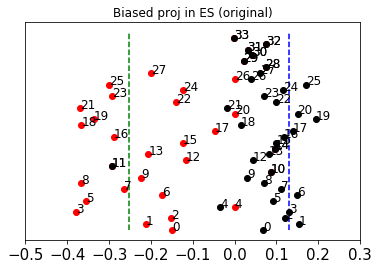

In [117]:
plot_bias_proj(es_ori_E, es_ori_gd, es_gender_pairs, es2plot, 'ES (original)')

avg dis(f_occ, f_seeds): 0.1745941196294392;     avg dis(m_occ, m_seeds): 0.07477419078350067


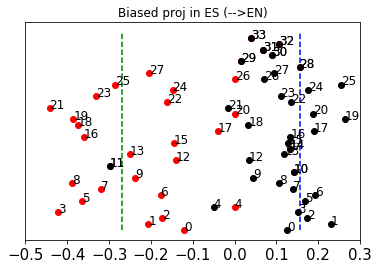

In [118]:
plot_bias_proj(es_sup_en_E, -es_sup_en_gd, es_gender_pairs, es2plot, 'ES (-->EN)')

avg dis(f_occ, f_seeds): 0.13090992368319454;     avg dis(m_occ, m_seeds): 0.06434743851423264


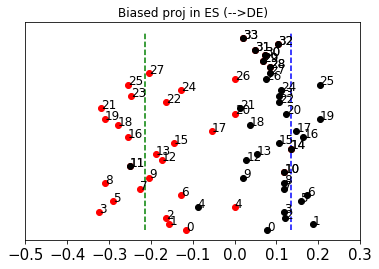

In [119]:
plot_bias_proj(es_sup_de_E, es_sup_de_gd, es_gender_pairs, es2plot, 'ES (-->DE)')

avg dis(f_occ, f_seeds): 0.1364157386124134;     avg dis(m_occ, m_seeds): 0.06038261950016022


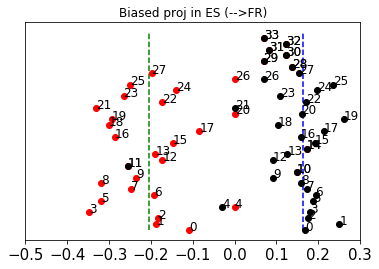

In [121]:
plot_bias_proj(es_sup_fr_E, -es_sup_fr_gd, es_gender_pairs, es2plot, 'ES (-->FR)')

avg dis(f_occ, f_seeds): 0.09686289552380056;     avg dis(m_occ, m_seeds): 0.08182042092084885


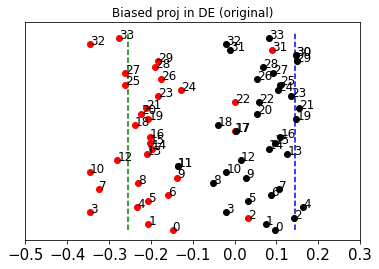

In [33]:
plot_bias_proj(de_ori_E, -de_ori_gd, de_gender_pairs, de2plot, 'DE (original)')

avg dis(f_occ, f_seeds): 0.09101911940995384;     avg dis(m_occ, m_seeds): 0.07346271723508835


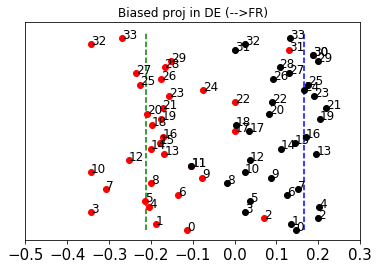

In [41]:
plot_bias_proj(de_sup_fr_E, de_sup_fr_gd, de_gender_pairs, de2plot, 'DE (-->FR)')

In [38]:
%reset de_sup_es_E

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Don't know how to reset  de_sup_es_e, please run `%reset?` for details


avg dis(f_occ, f_seeds): 0.11037081041756798;     avg dis(m_occ, m_seeds): 0.06670097261667252


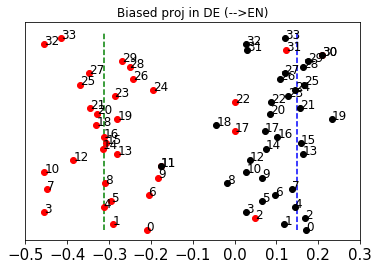

In [29]:
plot_bias_proj(de_sup_en_E, de_sup_en_gd, de_gender_pairs, de2plot, 'DE (-->EN)')

avg dis(f_occ, f_seeds): 0.08524360902169172;     avg dis(m_occ, m_seeds): 0.07326789945363998


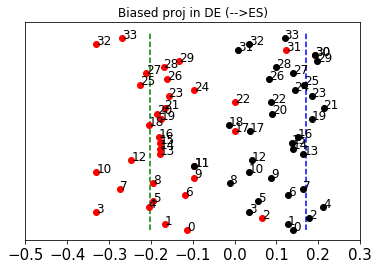

In [36]:
plot_bias_proj(de_sup_es_E, -de_sup_es_gd, de_gender_pairs, de2plot, 'DE (-->ES)')

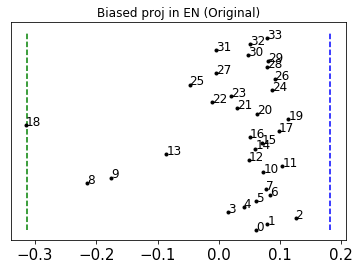

In [335]:
plot_en_bias_proj(en_ori_E, -en_ori_gd, gender_pairs, en2plot, 'EN (Original)')

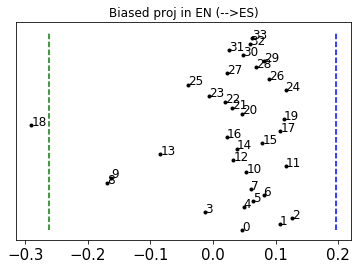

In [337]:
plot_en_bias_proj(en_sup_es_E, en_sup_es_gd, gender_pairs, en2plot, 'EN (-->ES)')

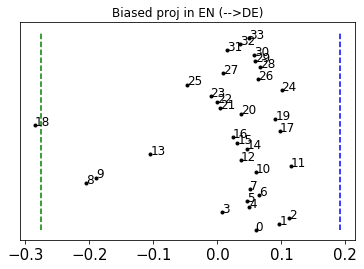

In [339]:
plot_en_bias_proj(en_sup_de_E, -en_sup_de_gd, gender_pairs, en2plot, 'EN (-->DE)')

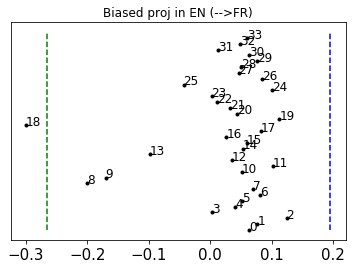

In [340]:
plot_en_bias_proj(en_sup_fr_E, en_sup_fr_gd, gender_pairs, en2plot, 'EN (-->FR)')

In [44]:
fr_gender_pairs

[['femme', 'homme'],
 ['fille', 'garçon'],
 ['elle', 'il'],
 ['mère', 'pére'],
 ['fille', 'fils'],
 ['gal', 'gars'],
 ['femelle', 'mâle'],
 ['marie', 'jean']]

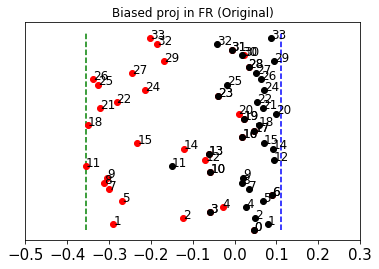

In [59]:
fr_ori_gd = we.doPCA(fr_gender_pairs, fr_ori_E).components_[0]
plot_bias_proj(fr_ori_E, fr_ori_gd, fr_gender_pairs, fr2plot, 'FR (Original)')

avg dis(f_occ, f_seeds): 0.17594937980175018;     avg dis(m_occ, m_seeds): 0.0717809796333313


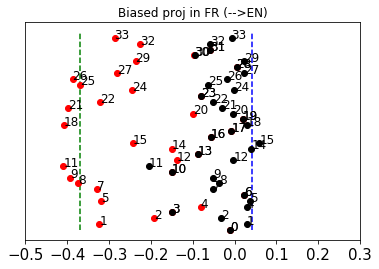

In [233]:
plot_bias_proj(fr_sup_en_E, -fr_sup_en_gd, fr_gender_pairs, fr2plot, 'FR (-->EN)')

avg dis(f_occ, f_seeds): 0.19337198138237;     avg dis(m_occ, m_seeds): 0.07243703305721283


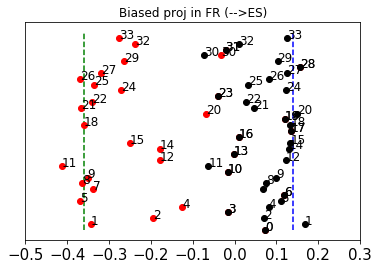

In [234]:
plot_bias_proj(fr_sup_es_E, fr_sup_es_gd, fr_gender_pairs, fr2plot, 'FR (-->ES)')

avg dis(f_occ, f_seeds): 0.19172769784927368;     avg dis(m_occ, m_seeds): 0.07766212522983551


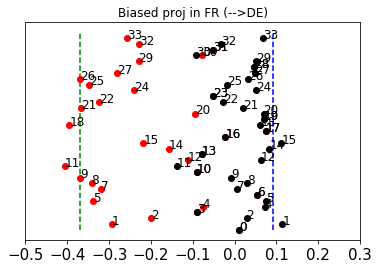

In [235]:
plot_bias_proj(fr_sup_de_E, fr_sup_de_gd, fr_gender_pairs, fr2plot, 'FR (-->DE)')

In [139]:
#only consider same set of occupations

In [185]:
O, F, M = cal_bias_paired(en_sup_fr_E, en2plot,\
                          en2plot, en2plot, gender_pairs)
print(f"in -en es, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -en es, average bias:0.04218344708137652, avg F_bias:0.6782069095355624, avg M_bias:0.6676026877015829


In [174]:
t = [x for x in es2plot if es2plot[x][0].lower() in es_ori_E.words\
     and es2plot[x][1].lower() in es_ori_E.words]
len(t)

31

In [178]:
O, F, M = cal_bias_paired(es_sup_fr_E, [es2plot[x][0] for x in t],\
                          [es2plot[x][1] for x in t], [x for x in t], es_gender_pairs)
print(f"in -en es, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -en es, average bias:0.055198035039354824, avg F_bias:0.543862413868682, avg M_bias:0.5323553620487131


In [170]:
t = [x for x in de2plot if de2plot[x][0].lower() in de_ori_E.words\
     and de2plot[x][1].lower() in de_ori_E.words]
# print(len(t))
O, F, M = cal_bias_paired(de_ori_E, [de2plot[x][0].lower() for x in t],\
                          [de2plot[x][1].lower() for x in t], [x for x in t], de_gender_pairs)
print(f"in -en fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -en fr, average bias:0.11061501991935074, avg F_bias:0.6460525010091563, avg M_bias:0.7392320862402104


In [144]:
O, F, M = cal_bias_paired(fr_ori_E, [fr2plot[x][0] for x in fr2plot],\
                          [fr2plot[x][1] for x in fr2plot], [x for x in fr2plot], fr_gender_pairs)
print(f"in -en fr, average bias:{O}, avg F_bias:{F}, avg M_bias:{M}")

in -en fr, average bias:0.08746826330282013, avg F_bias:0.7336312885231832, avg M_bias:0.7613252800108645


In [141]:
len(fr2plot)

34

## Get the most faraway words

In [274]:
def get_farthest(gender_direction, E, xx2plot):
    m_proj = [np.dot(gender_direction, E.v(xx2plot[x][0].lower())) \
              if xx2plot[x][0].lower() in E.words else 0 for x in en2plot]
    f_proj = [np.dot(gender_direction, E.v(xx2plot[x][1].lower())) \
                  if xx2plot[x][1].lower() in E.words else 0  for x in en2plot]
    m_smallest = np.argsort(m_proj)[:15]
    m_largest = np.argsort(m_proj)[-15:]
    f_smallest = np.argsort(f_proj)[:15]
    f_largest = np.argsort(f_proj)[-15:]
    x = list(set(m_smallest) & set(f_smallest)) + list(set(m_largest) & set(f_largest))
    print(len(x) / len(m_proj))
    print("Most left masculine words along the gender direction:")
    print([en2plot[x] for x in m_smallest])
    print("Most right masculine words along the gender direction:")
    print([en2plot[x] for x in m_largest])
    print('------')
    print("Most left feminine words along the gender direction:")
    print([en2plot[x] for x in f_smallest])
    print("Most right feminine words along the gender direction:")
    print([en2plot[x] for x in f_largest])
    return m_proj, f_proj

In [275]:
es_m, es_f = get_farthest(es_ori_gd, es_ori_E, es2plot)

0.35294117647058826
Most left masculine words along the gender direction:
['hooker', 'carpenter', 'president', 'electrician', 'nurse', 'officer', 'hairdresser', 'astronaut', 'warden', 'bodyguard', 'laborer', 'warrior', 'assassin', 'dancer', 'secretary']
Most right masculine words along the gender direction:
['coach', 'magistrate', 'mathematician', 'sailor', 'custodian', 'farmer', 'minister', 'butcher', 'caretaker', 'mobster', 'commissioner', 'plumber', 'boxer', 'teacher', 'philosopher']
------
Most left feminine words along the gender direction:
['caretaker', 'president', 'nurse', 'dancer', 'coach', 'philosopher', 'teacher', 'hooker', 'secretary', 'minister', 'custodian', 'hairdresser', 'boxer', 'librarian', 'warrior']
Most right feminine words along the gender direction:
['mathematician', 'farmer', 'laborer', 'mobster', 'electrician', 'plumber', 'warden', 'carpenter', 'officer', 'astronaut', 'bodyguard', 'drummer', 'superintendent', 'janitor', 'magistrate']


In [276]:
es_m, es_f = get_farthest(es_sup_en_gd, es_sup_en_E, es2plot)

0.3235294117647059
Most left masculine words along the gender direction:
['philosopher', 'teacher', 'boxer', 'commissioner', 'mobster', 'plumber', 'farmer', 'butcher', 'coach', 'drummer', 'caretaker', 'janitor', 'custodian', 'sailor', 'minister']
Most right masculine words along the gender direction:
['secretary', 'dancer', 'superintendent', 'warrior', 'bodyguard', 'warden', 'astronaut', 'hairdresser', 'electrician', 'laborer', 'nurse', 'officer', 'president', 'carpenter', 'hooker']
------
Most left feminine words along the gender direction:
['drummer', 'janitor', 'magistrate', 'superintendent', 'bodyguard', 'astronaut', 'electrician', 'officer', 'carpenter', 'warden', 'plumber', 'mobster', 'assassin', 'laborer', 'mathematician']
Most right feminine words along the gender direction:
['warrior', 'boxer', 'hairdresser', 'librarian', 'teacher', 'hooker', 'custodian', 'secretary', 'minister', 'coach', 'nurse', 'philosopher', 'dancer', 'caretaker', 'president']


In [277]:
es_m, es_f = get_farthest(es_sup_de_gd, es_sup_de_E, es2plot)

0.38235294117647056
Most left masculine words along the gender direction:
['hooker', 'carpenter', 'president', 'electrician', 'hairdresser', 'laborer', 'nurse', 'astronaut', 'librarian', 'officer', 'bodyguard', 'warden', 'assassin', 'warrior', 'drummer']
Most right masculine words along the gender direction:
['farmer', 'caretaker', 'custodian', 'dancer', 'janitor', 'butcher', 'plumber', 'magistrate', 'mobster', 'coach', 'minister', 'commissioner', 'boxer', 'teacher', 'philosopher']
------
Most left feminine words along the gender direction:
['caretaker', 'president', 'dancer', 'philosopher', 'coach', 'nurse', 'minister', 'teacher', 'hooker', 'secretary', 'custodian', 'hairdresser', 'warrior', 'librarian', 'laborer']
Most right feminine words along the gender direction:
['commissioner', 'farmer', 'assassin', 'mobster', 'warden', 'carpenter', 'plumber', 'electrician', 'astronaut', 'officer', 'bodyguard', 'drummer', 'superintendent', 'janitor', 'magistrate']


In [278]:
es_m, es_f = get_farthest(-es_sup_fr_gd, es_sup_fr_E, es2plot)

0.35294117647058826
Most left masculine words along the gender direction:
['hooker', 'carpenter', 'president', 'officer', 'warden', 'electrician', 'astronaut', 'laborer', 'hairdresser', 'nurse', 'secretary', 'bodyguard', 'superintendent', 'librarian', 'drummer']
Most right masculine words along the gender direction:
['plumber', 'assassin', 'sailor', 'custodian', 'magistrate', 'butcher', 'caretaker', 'coach', 'mathematician', 'commissioner', 'farmer', 'mobster', 'teacher', 'boxer', 'philosopher']
------
Most left feminine words along the gender direction:
['caretaker', 'president', 'coach', 'dancer', 'nurse', 'philosopher', 'minister', 'secretary', 'hooker', 'teacher', 'custodian', 'hairdresser', 'warrior', 'commissioner', 'librarian']
Most right feminine words along the gender direction:
['mathematician', 'farmer', 'assassin', 'mobster', 'warden', 'carpenter', 'plumber', 'officer', 'electrician', 'astronaut', 'bodyguard', 'superintendent', 'drummer', 'janitor', 'magistrate']


In [279]:
fr_m, fr_f = get_farthest(fr_ori_gd, fr_ori_E, fr2plot)

0.20588235294117646
Most left masculine words along the gender direction:
['hooker', 'librarian', 'caretaker', 'janitor', 'superintendent', 'secretary', 'teacher', 'astronaut', 'bodyguard', 'dancer', 'minister', 'hairdresser', 'philosopher', 'carpenter', 'drummer']
Most right masculine words along the gender direction:
['warrior', 'sailor', 'nurse', 'warden', 'president', 'coach', 'mathematician', 'farmer', 'boxer', 'electrician', 'commissioner', 'magistrate', 'laborer', 'officer', 'plumber']
------
Most left feminine words along the gender direction:
['hooker', 'nurse', 'warden', 'teacher', 'president', 'dancer', 'hairdresser', 'custodian', 'boxer', 'sailor', 'coach', 'warrior', 'mathematician', 'farmer', 'electrician']
Most right feminine words along the gender direction:
['laborer', 'librarian', 'janitor', 'caretaker', 'secretary', 'carpenter', 'astronaut', 'plumber', 'minister', 'philosopher', 'bodyguard', 'drummer', 'assassin', 'mobster', 'commissioner']


In [280]:
fr_m, fr_f = get_farthest(-fr_sup_en_gd, fr_sup_en_E, fr2plot)

0.38235294117647056
Most left masculine words along the gender direction:
['hooker', 'caretaker', 'janitor', 'bodyguard', 'librarian', 'secretary', 'teacher', 'superintendent', 'astronaut', 'minister', 'hairdresser', 'sailor', 'custodian', 'dancer', 'butcher']
Most right masculine words along the gender direction:
['electrician', 'laborer', 'plumber', 'farmer', 'drummer', 'philosopher', 'warrior', 'commissioner', 'officer', 'boxer', 'nurse', 'carpenter', 'coach', 'magistrate', 'mathematician']
------
Most left feminine words along the gender direction:
['hooker', 'nurse', 'president', 'hairdresser', 'warden', 'dancer', 'teacher', 'custodian', 'boxer', 'sailor', 'coach', 'electrician', 'warrior', 'farmer', 'mathematician']
Most right feminine words along the gender direction:
['caretaker', 'magistrate', 'laborer', 'plumber', 'bodyguard', 'librarian', 'carpenter', 'secretary', 'astronaut', 'minister', 'assassin', 'mobster', 'drummer', 'philosopher', 'commissioner']


In [281]:
fr_m, fr_f = get_farthest(fr_sup_es_gd, fr_sup_es_E, fr2plot)

0.3235294117647059
Most left masculine words along the gender direction:
['bodyguard', 'hooker', 'secretary', 'astronaut', 'caretaker', 'janitor', 'librarian', 'minister', 'superintendent', 'sailor', 'teacher', 'president', 'custodian', 'butcher', 'assassin']
Most right masculine words along the gender direction:
['officer', 'coach', 'commissioner', 'philosopher', 'laborer', 'farmer', 'warrior', 'electrician', 'magistrate', 'nurse', 'mathematician', 'mobster', 'plumber', 'drummer', 'boxer']
------
Most left feminine words along the gender direction:
['hooker', 'warden', 'coach', 'president', 'dancer', 'nurse', 'hairdresser', 'boxer', 'sailor', 'custodian', 'teacher', 'warrior', 'electrician', 'farmer', 'officer']
Most right feminine words along the gender direction:
['laborer', 'carpenter', 'plumber', 'secretary', 'bodyguard', 'astronaut', 'janitor', 'caretaker', 'librarian', 'minister', 'assassin', 'commissioner', 'philosopher', 'mobster', 'drummer']


In [282]:
fr_m, fr_f = get_farthest(fr_sup_de_gd, fr_sup_de_E, fr2plot)

0.35294117647058826
Most left masculine words along the gender direction:
['hooker', 'bodyguard', 'caretaker', 'janitor', 'librarian', 'astronaut', 'secretary', 'superintendent', 'sailor', 'minister', 'teacher', 'hairdresser', 'custodian', 'assassin', 'president']
Most right masculine words along the gender direction:
['warrior', 'farmer', 'officer', 'commissioner', 'nurse', 'laborer', 'electrician', 'plumber', 'philosopher', 'carpenter', 'mobster', 'coach', 'magistrate', 'mathematician', 'boxer']
------
Most left feminine words along the gender direction:
['hooker', 'nurse', 'warden', 'hairdresser', 'president', 'teacher', 'dancer', 'coach', 'sailor', 'custodian', 'boxer', 'warrior', 'electrician', 'farmer', 'officer']
Most right feminine words along the gender direction:
['laborer', 'plumber', 'janitor', 'caretaker', 'librarian', 'bodyguard', 'carpenter', 'astronaut', 'secretary', 'minister', 'assassin', 'drummer', 'commissioner', 'philosopher', 'mobster']


In [283]:
de_m, de_f = get_farthest(-de_ori_gd, de_ori_E, de2plot)

0.38235294117647056
Most left masculine words along the gender direction:
['hooker', 'dancer', 'nurse', 'janitor', 'caretaker', 'superintendent', 'astronaut', 'mobster', 'laborer', 'hairdresser', 'coach', 'plumber', 'warden', 'sailor', 'drummer']
Most right masculine words along the gender direction:
['warrior', 'mathematician', 'assassin', 'farmer', 'custodian', 'teacher', 'minister', 'librarian', 'secretary', 'butcher', 'bodyguard', 'philosopher', 'officer', 'president', 'carpenter']
------
Most left feminine words along the gender direction:
['caretaker', 'janitor', 'superintendent', 'custodian', 'laborer', 'electrician', 'teacher', 'warrior', 'nurse', 'carpenter', 'dancer', 'plumber', 'president', 'librarian', 'philosopher']
Most right feminine words along the gender direction:
['magistrate', 'drummer', 'secretary', 'officer', 'warden', 'commissioner', 'assassin', 'hairdresser', 'hooker', 'farmer', 'sailor', 'mobster', 'butcher', 'astronaut', 'bodyguard']


In [284]:
de_m, de_f = get_farthest(de_sup_en_gd, de_sup_en_E, de2plot)

0.47058823529411764
Most left masculine words along the gender direction:
['hooker', 'nurse', 'dancer', 'superintendent', 'caretaker', 'janitor', 'astronaut', 'laborer', 'hairdresser', 'coach', 'mobster', 'magistrate', 'plumber', 'sailor', 'commissioner']
Most right masculine words along the gender direction:
['electrician', 'secretary', 'custodian', 'farmer', 'carpenter', 'president', 'mathematician', 'drummer', 'librarian', 'teacher', 'butcher', 'assassin', 'officer', 'bodyguard', 'philosopher']
------
Most left feminine words along the gender direction:
['caretaker', 'superintendent', 'janitor', 'custodian', 'electrician', 'laborer', 'teacher', 'warrior', 'president', 'nurse', 'plumber', 'magistrate', 'carpenter', 'minister', 'dancer']
Most right feminine words along the gender direction:
['philosopher', 'librarian', 'officer', 'drummer', 'warden', 'assassin', 'commissioner', 'farmer', 'hairdresser', 'hooker', 'sailor', 'mobster', 'butcher', 'astronaut', 'bodyguard']


In [285]:
de_m, de_f = get_farthest(-de_sup_es_gd, de_sup_es_E, de2plot)

0.4411764705882353
Most left masculine words along the gender direction:
['hooker', 'nurse', 'dancer', 'astronaut', 'caretaker', 'superintendent', 'janitor', 'mobster', 'laborer', 'coach', 'warden', 'sailor', 'hairdresser', 'plumber', 'drummer']
Most right masculine words along the gender direction:
['magistrate', 'assassin', 'warrior', 'farmer', 'minister', 'custodian', 'librarian', 'teacher', 'butcher', 'secretary', 'philosopher', 'bodyguard', 'officer', 'carpenter', 'president']
------
Most left feminine words along the gender direction:
['caretaker', 'janitor', 'superintendent', 'custodian', 'electrician', 'laborer', 'teacher', 'warrior', 'carpenter', 'nurse', 'dancer', 'coach', 'plumber', 'minister', 'mathematician']
Most right feminine words along the gender direction:
['president', 'boxer', 'warden', 'secretary', 'officer', 'commissioner', 'assassin', 'hairdresser', 'farmer', 'hooker', 'mobster', 'sailor', 'butcher', 'astronaut', 'bodyguard']


In [286]:
de_m, de_f = get_farthest(de_sup_fr_gd, de_sup_fr_E, de2plot)

0.47058823529411764
Most left masculine words along the gender direction:
['hooker', 'dancer', 'astronaut', 'nurse', 'janitor', 'caretaker', 'superintendent', 'mobster', 'laborer', 'coach', 'plumber', 'hairdresser', 'sailor', 'warden', 'drummer']
Most right masculine words along the gender direction:
['boxer', 'mathematician', 'assassin', 'custodian', 'farmer', 'minister', 'teacher', 'bodyguard', 'secretary', 'librarian', 'officer', 'butcher', 'carpenter', 'philosopher', 'president']
------
Most left feminine words along the gender direction:
['superintendent', 'caretaker', 'janitor', 'custodian', 'electrician', 'laborer', 'warrior', 'teacher', 'coach', 'plumber', 'carpenter', 'magistrate', 'dancer', 'nurse', 'boxer']
Most right feminine words along the gender direction:
['minister', 'librarian', 'drummer', 'secretary', 'officer', 'commissioner', 'assassin', 'hooker', 'hairdresser', 'farmer', 'sailor', 'mobster', 'butcher', 'astronaut', 'bodyguard']


In [287]:
#increase the occupation list

In [321]:
en_occ_male_def = [x.strip().split('\t')[0] for x in open('es_male_def_occ').readlines()]
en_occ_female_def = [x.strip().split('\t')[0] for x in open('es_female_def_occ').readlines()]

In [325]:
en_occ_male_def[:14]

['countryman',
 'fraternal',
 'wizards',
 'manservant',
 'divo',
 'actor',
 'bachelor',
 'dukes',
 'barman',
 'countrymen',
 'brideprice',
 'hosts',
 'airmen',
 'andropause']

In [324]:
en_occ_female_def[:14]

['countrywoman',
 'sororal',
 'witches',
 'maidservant',
 'diva',
 'actress',
 'spinster',
 'duchesses',
 'barwoman',
 'countrywomen',
 'dowry',
 'hostesses',
 'airwomen',
 'menopause']

In [314]:
len(en_occ_female_def), 

(137,)

In [329]:
with open('fr_male_def_occ', 'w') as f:
    for x in en_occ_male_def:
            f.write(x+'\t' + '\t'.join(en2fr[x]) + '\n')

In [303]:
en2es['sorcerer']

['brujo', 'hechicero']